In [5]:
# importing project dependencies:

#  Numpy and Pandas 
import numpy as np
import pandas as pd

# visualization dependencies
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# stats dependency
from scipy import stats

# feature_engineering dependency
import feature_engine

#Warnings Filetering 
import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.set_option('display.max_columns',None)

In [182]:
# importing the datasets

In [8]:
df = pd.read_csv("Data file.csv",index_col=[0])

In [9]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [10]:
df.columns,len(df.columns)

(Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
        'rental90', 'last_rech_date_ma', 'last_rech_date_da',
        'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
        'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
        'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
        'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
        'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
        'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
        'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
        'payback90', 'pcircle', 'pdate'],
       dtype='object'),
 36)

In [11]:
df.sample(10)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
24326,1,69150I91190,368.000000,2120.583333,2147.500000,275.04,374.32,1.0,0.0,770,4,3.0,3083.0,770.0,48.00,10,2,6521,771.5,38.50,0.0,0.000000,0,0,4,24,6.0,0.0,6.0,36,6,0.0,9.000000,8.000000,UPW,2016-07-17
141749,1,02318I89238,1561.000000,470.543333,470.543333,-466.18,-466.18,1.0,0.0,8000,8,1.0,61148.0,7763.0,231.60,8,1,61148,7763.0,231.60,0.0,0.000000,0,0,3,18,6.0,0.0,3.0,18,6,0.0,3.666667,3.666667,UPW,2016-06-22
83679,1,50895I88689,1361.000000,12289.000000,12395.780000,900.22,1397.32,4.0,0.0,1539,4,5.0,8665.0,1539.0,108.17,7,8,17530,1539.0,107.17,0.0,611322.819255,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.000000,0.000000,UPW,2016-07-30
21768,1,06132I89231,864226.267557,10532.968333,10597.810000,1160.88,1747.88,14.0,0.0,8000,1,0.0,8000.0,8000.0,14.83,2,34,16000,8000.0,435.33,0.0,0.000000,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-25
94414,0,76021I84458,131.000000,3300.000000,3300.000000,1531.83,1769.13,5.0,0.0,1539,2,5.0,2309.0,1154.5,58.00,2,5,2309,1154.5,58.00,0.0,0.000000,0,0,2,12,6.0,0.0,3.0,18,6,0.0,15.000000,15.000000,UPW,2016-07-21
138563,1,12777I85348,361.000000,189.351000,189.351000,4885.65,4885.65,3.0,0.0,4048,10,1.0,24270.0,2309.0,93.00,12,1,28310,2309.0,93.00,0.0,0.000000,0,0,5,30,6.0,0.0,5.0,30,6,0.0,1.600000,1.600000,UPW,2016-06-27
106741,1,74094I88649,519.000000,6471.770000,6491.310000,6920.83,7083.23,5.0,0.0,770,7,0.0,5402.0,773.0,51.00,11,0,8494,773.0,49.00,0.0,0.000000,0,0,3,18,6.0,0.0,4.0,24,6,0.0,5.000000,5.000000,UPW,2016-07-20
202697,1,94733I88659,139.000000,2019.166667,2023.000000,3202.40,3717.30,2.0,0.0,773,4,3.0,3092.0,773.0,34.50,5,3,3865,773.0,21.00,0.0,0.000000,0,0,2,12,6.0,0.0,3.0,18,6,0.0,13.000000,13.000000,UPW,2016-07-05
18778,1,55675I88649,1134.000000,27.766667,27.766667,2418.59,2418.59,4.0,0.0,770,4,0.0,6176.0,1543.0,56.00,5,33,7123,1539.0,59.00,0.0,0.000000,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-17
78408,1,04950I82739,997.000000,2835.706667,2859.060000,479.69,569.69,5.0,0.0,770,4,7.0,4618.0,1154.5,105.00,9,2,9245,770.0,196.00,0.0,0.000000,0,0,4,24,6.0,0.0,5.0,30,6,0.0,5.666667,4.500000,UPW,2016-07-10


In [12]:
#Dataset details 
# more infor on the dataset 
print('Size of dataset \n ',df.shape,'\n')
print('Details dataset\n' ,df.info(),'\n')
print('Checking for NULL/Missing values \n',df.isna().sum())

Size of dataset 
  (209593, 36) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal

In [15]:
# o missing data as mentioned in the sheet

In [17]:

# description of the categorcal features
df.describe(include=np.object)

,msisdn,pcircle,pdate
count,209593,209593,209593
unique,186243,1,82
top,04581I85330,UPW,2016-07-04
freq,7,209593,3150


In [18]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [20]:
# checking for correlated features in the dataset
df_corr = df.corr()
df_corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


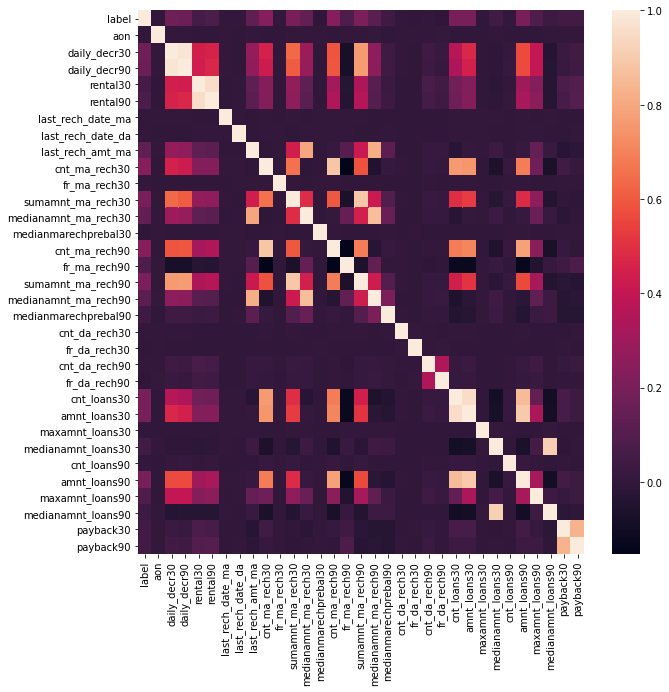

In [21]:
# Plotting Correelation matrix 
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot = False)
plt.show()

In [15]:
df.corr()['daily_decr30']

label                   0.168298
aon                     0.001104
daily_decr30            1.000000
daily_decr90            0.977704
rental30                0.442066
rental90                0.458977
last_rech_date_ma       0.000487
last_rech_date_da      -0.001636
last_rech_amt_ma        0.275837
cnt_ma_rech30           0.451385
fr_ma_rech30           -0.000577
sumamnt_ma_rech30       0.636536
medianamnt_ma_rech30    0.295356
medianmarechprebal30   -0.001153
cnt_ma_rech90           0.587338
fr_ma_rech90           -0.078299
sumamnt_ma_rech90       0.762981
medianamnt_ma_rech90    0.257847
medianmarechprebal90    0.037495
cnt_da_rech30           0.000700
fr_da_rech30           -0.001499
cnt_da_rech90           0.038814
fr_da_rech90            0.020673
cnt_loans30             0.366116
amnt_loans30            0.471492
maxamnt_loans30        -0.000028
medianamnt_loans30     -0.011610
cnt_loans90             0.008962
amnt_loans90            0.563496
maxamnt_loans90         0.400199
medianamnt

* Daily spent of main account for 30 days and 90 days is highly (near perfectly) correlated.
###### The rest of the features seems fine.

In [ ]:
## Univariate Analysis

In [16]:
# Analyzing label
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

* Inbalanced data as already revealed


In [ ]:
# Age of the cellular network

<AxesSubplot:xlabel='aon', ylabel='Density'>

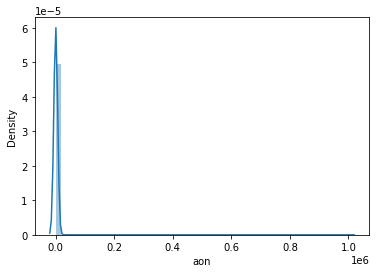

In [20]:
sns.distplot(df.aon)

In [22]:
len(df.aon.unique())

4507

In [ ]:
# average of daily use over 30 days and 90 days

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

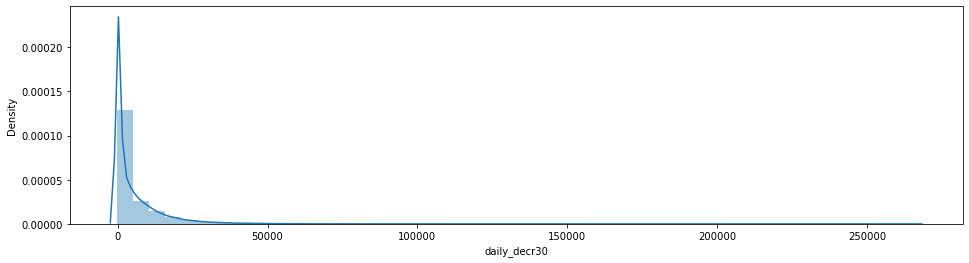

In [25]:
plt.figure(figsize=(16,4))
sns.distplot(df.daily_decr30)

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

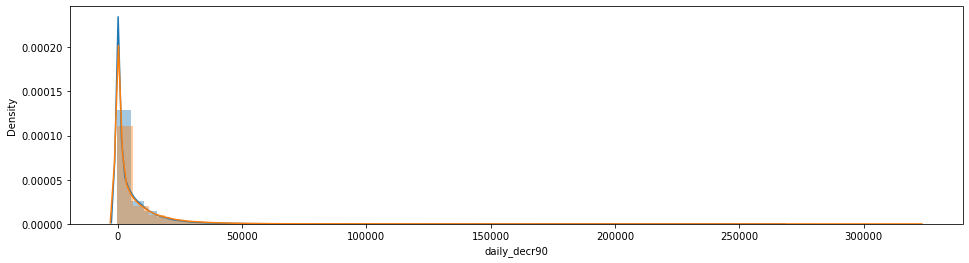

In [23]:
plt.figure(figsize=(16,4))
sns.distplot(df.daily_decr30)
sns.distplot(df.daily_decr90)

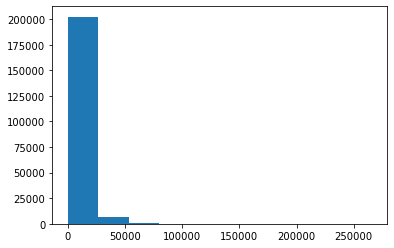

<Figure size 1152x288 with 0 Axes>

In [26]:
plt.hist(df.daily_decr30)
plt.figure(figsize=(16,4))
plt.show()


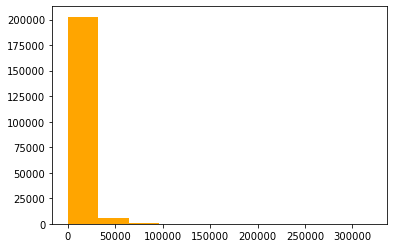

In [27]:
plt.hist(df.daily_decr90,color='orange');

In [33]:
# lets get the values over 50000
sample_loss=len(df[df.daily_decr90 > 50000])
sample_loss

2091

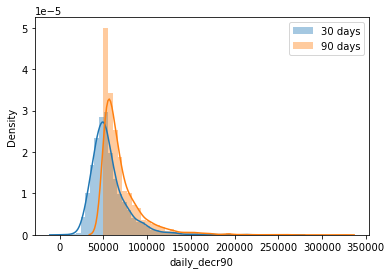

In [30]:
sns.distplot(df[df.daily_decr90 > 50000]['daily_decr30'],label = '30 days')
sns.distplot(df[df.daily_decr90 > 50000]['daily_decr90'], label = '90 days')
plt.legend()
plt.show()

In [34]:
#loss percentage
sample_loss / len(df) * 100

0.9976478222078028

In [ ]:
# Approx less than 1% of data will be lost if these are removed.

<AxesSubplot:xlabel='rental90'>

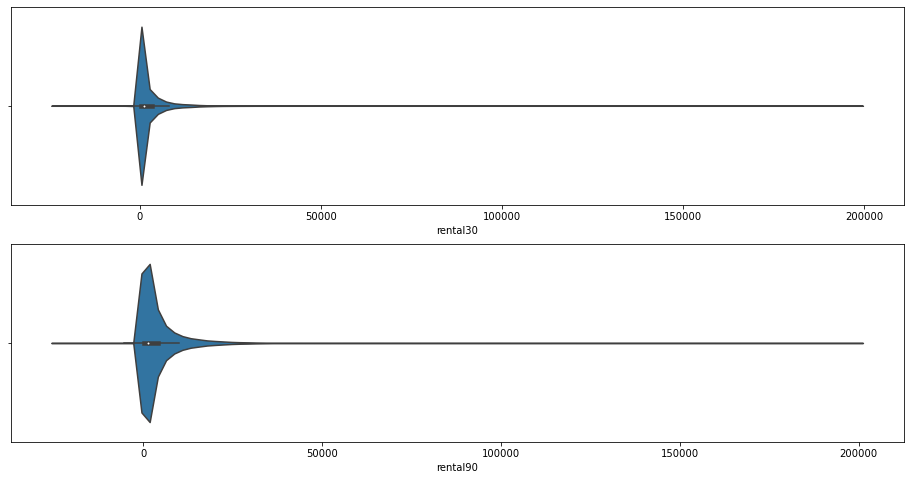

In [36]:
# rental30 
fig = plt.figure(figsize=(16,8))

fig.add_subplot(211)
sns.violinplot(df.rental30)

fig.add_subplot(212)
sns.violinplot(df.rental90)

<AxesSubplot:xlabel='rental90'>

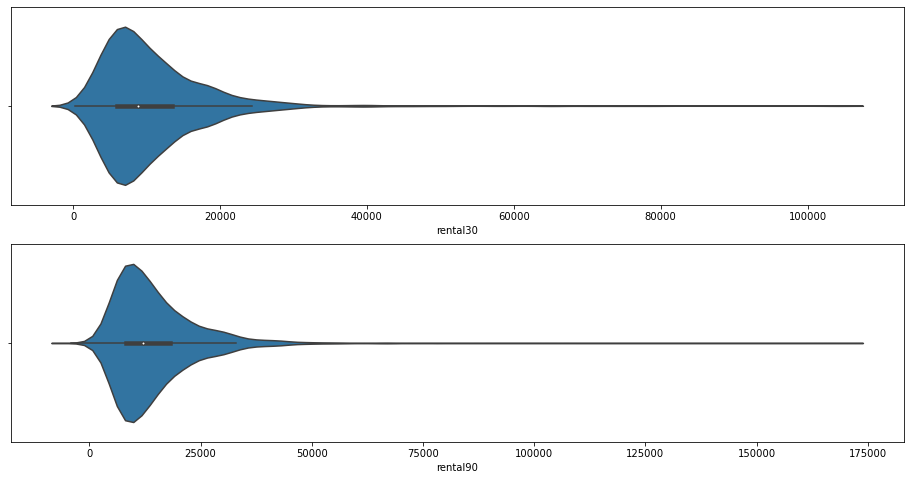

In [37]:
fig = plt.figure(figsize=(16,8))

fig.add_subplot(211)
sns.violinplot(df[df.daily_decr90 > 50000].rental30)

fig.add_subplot(212)
sns.violinplot(df[df.daily_decr90 > 50000].rental90)

* Thys we can confimr that there  2100 customers are not is sacle or ais anamoly .
* Before affirming the abolision of this 1 percent of the data from the dataset, we need to reaffirm little more 

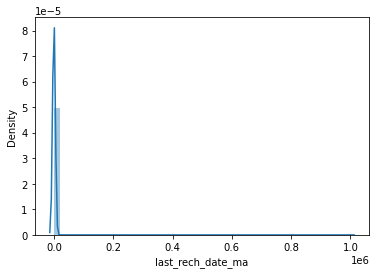

In [38]:
# number of days since last recharge (in main account)
sns.distplot(df.last_rech_date_ma)
plt.show()

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

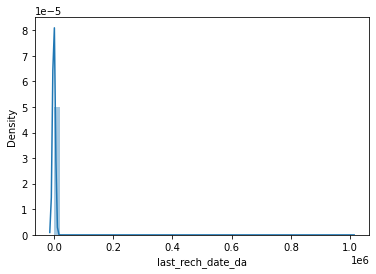

In [42]:
# number of days since last recharge (in  data account)
sns.distplot(df.last_rech_date_da)

In [43]:
# let's get the last 1 quantile of the data for main balancer 
q = df.last_rech_date_ma.quantile(0.99)

In [44]:
df[df.last_rech_date_ma > q]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
31,1,70130I90843,-42.0,8.864333,8.864333,780.71,780.71,780195.497093,0.0,773,2,10.0,946.0,473.0,1.8,3,32,2666,773.0,0.30,0.0,0.0,0,0,1,6,6.0,1.0,1.0,6,6,1.0,0.000000,0.00,UPW,2016-06-07
54,1,09561I70374,635.0,5.500000,5.500000,75.90,75.90,559958.753409,0.0,173,0,0.0,0.0,0.0,0.0,1,0,173,173.0,94.47,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.00,UPW,2016-06-05
107,0,15429I84458,72.0,13.590000,13.590000,0.00,0.00,64.000000,0.0,773,0,0.0,0.0,0.0,0.0,1,0,773,773.0,20.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.00,UPW,2016-06-27
160,1,84667I85348,415.0,9507.542667,9622.480000,418.58,-239.39,835708.591971,0.0,1924,5,2.0,8081.0,1924.0,76.0,6,17,9620,1731.5,52.00,0.0,0.0,0,0,4,30,12.0,0.0,4.0,30,12,0.0,4.666667,9.75,UPW,2016-07-19
234,1,29143I95202,211.0,0.640000,0.640000,227.60,227.60,942339.085159,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,1.0,1.0,6,6,1.0,0.000000,0.00,UPW,2016-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209467,1,59525I88698,190.0,2601.750000,2622.100000,-334.62,-441.57,767980.563105,0.0,1539,4,12.0,6156.0,1539.0,145.5,5,47,7703,1539.0,26.00,0.0,0.0,0,0,3,24,12.0,0.0,3.0,24,12,0.0,6.000000,6.00,UPW,2016-07-05
209502,1,54642I70787,460.0,55.520000,55.520000,877.40,877.40,611678.500427,0.0,1539,1,0.0,1539.0,1539.0,0.5,2,42,2486,1243.0,30.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,13.000000,13.00,UPW,2016-06-10
209522,1,25171I84457,281.0,1704.000000,1795.070000,0.00,180.00,61.000000,0.0,3178,0,0.0,0.0,0.0,0.0,2,1,6356,3178.0,616.50,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.00,UPW,2016-08-10
209534,0,41672I95204,168.0,15.400000,15.400000,922.20,922.20,590843.121987,0.0,1539,1,0.0,1539.0,1539.0,1.0,1,0,1539,1539.0,1.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.00,UPW,2016-06-30


In [22]:
# let's get the last 1 quantile of the data for data
q1 = df.last_rech_date_da.quantile(0.99)
df[df.last_rech_date_da < q1]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

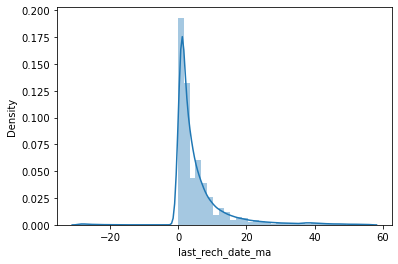

In [45]:
sns.distplot(df[df.last_rech_date_ma < q]['last_rech_date_ma'])

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

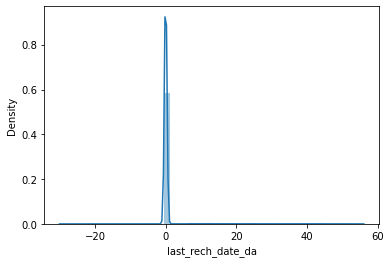

In [48]:
sns.distplot(df[df.last_rech_date_da < q1]['last_rech_date_da'])

In [ ]:
# We can see that most of the users have last recahrge on penultimate days 

In [49]:
df[df.last_rech_date_da == 0

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,19900I95200,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,3178,3,3.0,12143.0,3178.0,914.00,5,17,14455,3178.0,28.00,0.0,0.0,0,0,1,12,12.0,1.0,3.0,24,12,1.0,0.000000,30.000000,UPW,2016-08-02
209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29


In [23]:
df[df.last_rech_date_da == 0]['cnt_da_rech90'].unique()

array([0, 1], dtype=int64)

In [52]:
x=df[((df.last_rech_date_da == 0) & (df.cnt_da_rech90 == 0) & (df.fr_da_rech90 == 0))]
x

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,19900I95200,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,3178,3,3.0,12143.0,3178.0,914.00,5,17,14455,3178.0,28.00,0.0,0.0,0,0,1,12,12.0,1.0,3.0,24,12,1.0,0.000000,30.000000,UPW,2016-08-02
209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29


In [54]:
# let's get the people have a data account.
df[((df.last_rech_date_da != 0) & (df.cnt_da_rech90 != 0) & (df.fr_da_rech90 != 0))]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
454,1,50442I95202,127.0,5488.006000,5513.084667,4389.15,4160.53,5.0,8.0,770,2,0.0,1540.0,770.0,391.00,2,0,1540,770.0,391.00,2.0,9.0,3,16,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-07-23
866,1,24988I88648,1382.0,1624.816667,1654.450000,4115.28,5465.16,2.0,19.0,770,3,5.0,3864.0,1547.0,89.00,7,5,8504,1547.0,89.00,2.0,8.0,2,8,3,18,6.0,0.0,7.0,42,6,0.0,10.000000,4.500000,UPW,2016-07-23
926,0,35846I70786,544.0,5383.128000,5430.317333,12472.59,14278.59,1.0,19.0,1539,2,19.0,13413.0,6706.5,1.75,3,18,18330,4917.0,3.50,2.0,10.0,5,5,2,12,6.0,0.0,3.0,18,6,0.0,7.500000,7.666667,UPW,2016-07-23
935,1,14755I84451,1713.0,3288.523333,3323.570000,17215.35,18499.71,1.0,12.0,770,4,16.0,4618.0,1154.5,65.00,8,4,10005,1539.0,78.00,4.0,7.0,6,11,1,6,6.0,1.0,2.0,12,6,1.0,0.000000,2.500000,UPW,2016-07-23
2507,1,17921I70374,417.0,841.949333,852.514667,5353.14,7686.38,14.0,14.0,770,1,0.0,770.0,770.0,60.00,2,25,1540,770.0,37.00,1.0,0.0,3,4,1,6,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-07-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208596,1,37536I70781,631.0,37099.794333,37285.383000,7341.04,6875.68,12.0,10.0,4048,3,11.0,24048.0,10000.0,75.00,6,2,52048,10000.0,49.50,7.0,1.0,7,1,5,30,6.0,0.0,7.0,42,6,0.0,3.250000,2.714286,UPW,2016-07-23
208677,1,31171I88649,1170.0,7293.340000,7311.820000,8400.68,9103.90,5.0,16.0,1539,3,9.0,5002.0,1539.0,23.03,5,11,8080,1539.0,23.03,3.0,6.0,5,11,4,36,12.0,0.0,5.0,42,12,0.0,6.333333,5.000000,UPW,2016-07-23
209112,1,28011I83939,515.0,7310.464000,7321.458667,4181.87,4393.13,1.0,20.0,770,5,8.0,5402.0,773.0,65.20,6,14,6172,773.0,72.20,2.0,10.0,2,10,5,30,6.0,0.0,6.0,36,6,0.0,6.500000,7.400000,UPW,2016-07-23
209160,1,10839I89230,542.0,17301.901333,17407.704000,13027.18,15072.02,4.0,11.0,1539,17,2.0,23856.0,1539.0,127.00,26,1,37824,1539.0,117.50,3.0,17.0,8,1,13,114,12.0,0.0,21.0,162,12,0.0,1.833333,1.650000,UPW,2016-07-23


In [56]:
865 / len (df) 

0.004127046227688902

In [ ]:
#less than 0.5 percent of the customers hava a data account.

In [59]:
# last amount recharged in the main account since last 30 days
len(df.last_rech_amt_ma.unique())

70

In [60]:
df.last_rech_amt_ma.describe()

count    209593.000000
mean       2064.452797
std        2370.786034
min           0.000000
25%         770.000000
50%        1539.000000
75%        2309.000000
max       55000.000000
Name: last_rech_amt_ma, dtype: float64

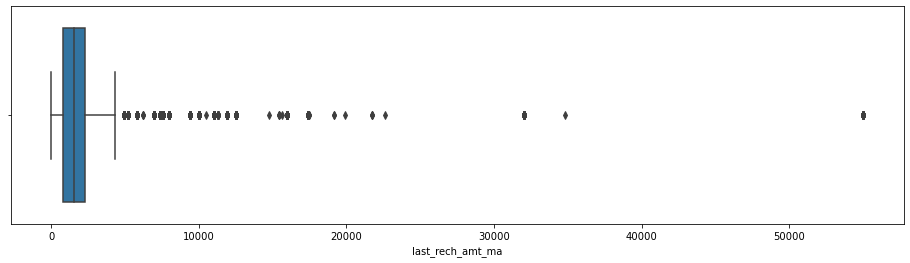

In [69]:
plt.figure(figsize=(16,4))
sns.boxplot(df.last_rech_amt_ma)
plt.show()

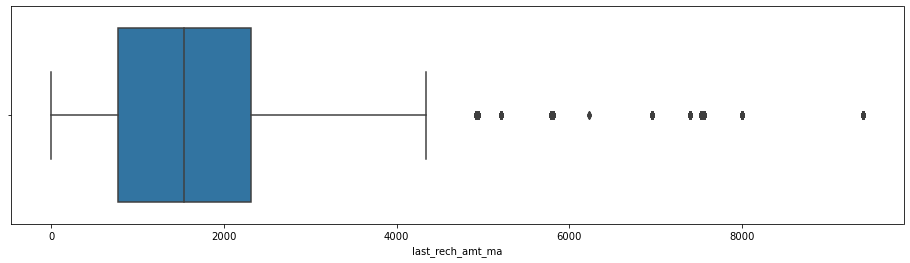

In [71]:
# Removing the last quantile
plt.figure(figsize=(16,4))
sns.boxplot(df[df.last_rech_amt_ma < df.last_rech_amt_ma.quantile(0.99)]['last_rech_amt_ma'])
plt.show()

<AxesSubplot:xlabel='cnt_ma_rech30'>

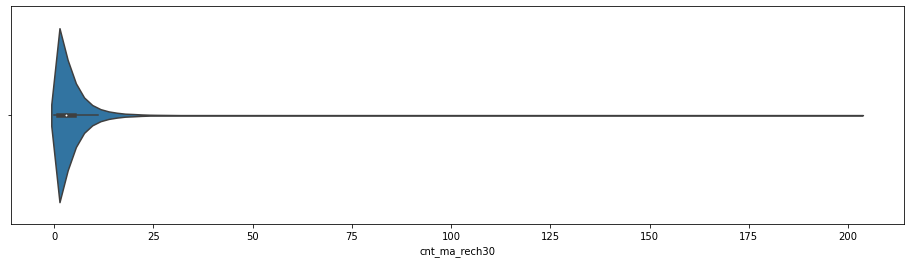

In [72]:
# number of times the recharge is done in the last 30 days and 90 days
plt.figure(figsize=(16,4))
sns.violinplot(df.cnt_ma_rech30)

<AxesSubplot:xlabel='cnt_ma_rech90'>

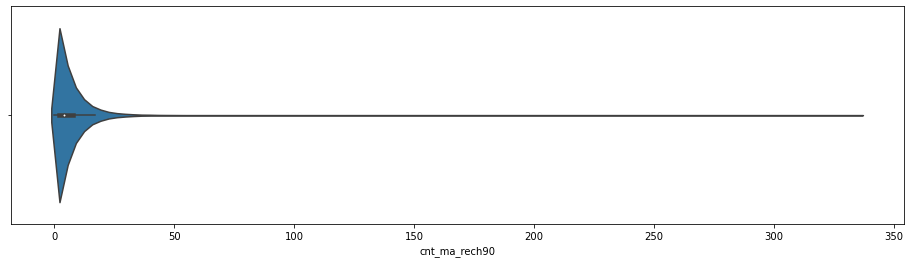

In [73]:
plt.figure(figsize=(16,4))
sns.violinplot(df.cnt_ma_rech90)

<AxesSubplot:xlabel='cnt_ma_rech30'>

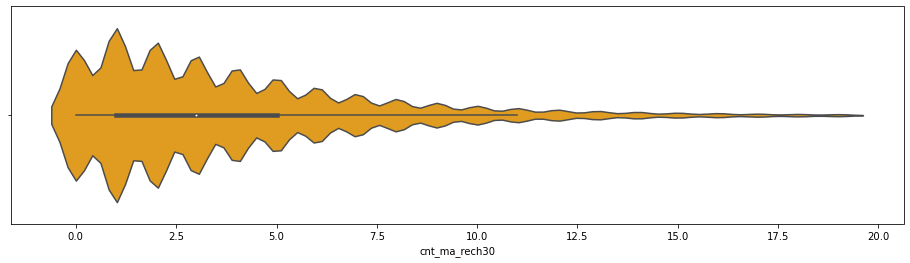

In [76]:
# getting rid of the last 1 qauntile ...
# data after removing the last quantile
plt.figure(figsize=(16,4))
sns.violinplot(df[df.cnt_ma_rech30 < df.cnt_ma_rech30.quantile(0.99)]['cnt_ma_rech30'],color='orange')

<AxesSubplot:xlabel='cnt_ma_rech90'>

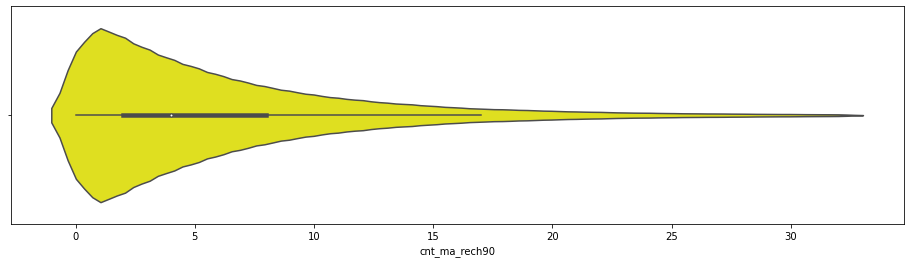

In [75]:
plt.figure(figsize=(16,4))
sns.violinplot(df[df.cnt_ma_rech90 < df.cnt_ma_rech90.quantile(0.99)]['cnt_ma_rech90'],color='yellow')

* thus just eliminating 1 quantile of the data  decreased the skewness  by a very larger margin.
* The violin plot of the count of last 90 days is  stable thandata with 30 days.

In [80]:
# number of times te loan is taken by the user in 30 days and 90 days
len(df.cnt_loans30)

209593

In [81]:
len(df.cnt_loans90)

209593

<AxesSubplot:xlabel='cnt_da_rech90', ylabel='Density'>

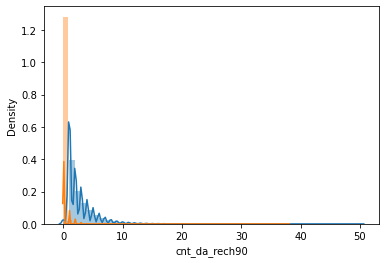

In [82]:
sns.distplot(df.cnt_loans30)
sns.distplot(df.cnt_da_rech90)


<AxesSubplot:xlabel='pcircle', ylabel='count'>

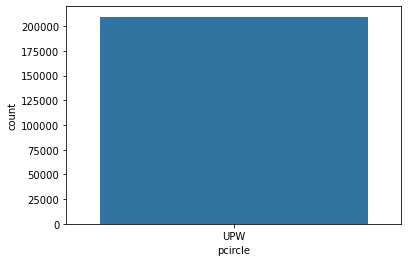

In [83]:
# total number of circles
sns.countplot(df.pcircle)

In [84]:
df.pcircle.value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [85]:
(df.amnt_loans90 / df.cnt_loans90  == df.maxamnt_loans90).value_counts()

True     186503
False     23090
dtype: int64

In [86]:
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [87]:
df[(df.amnt_loans90 / df.cnt_loans90  != df.maxamnt_loans90)]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
37,1,41249I82731,1578.0,38740.076000,38935.57,4662.68,5416.68,1.0,0.0,4048,10,2.0,29475.0,2309.0,45.24,20,4,50839,2309.0,62.74,0.0,0.0,0,0,6,54,12.0,0.0,15.0,108,12,0.0,2.0,1.875000,UPW,2016-07-26
38,1,01210I90840,725.0,9740.000000,16337.04,299.96,1457.22,15.0,63.0,5787,1,0.0,5787.0,5787.0,146.50,6,8,21009,4048.0,131.00,0.0,0.0,1,0,3,24,12.0,1.0,4.0,30,12,0.5,7.5,19.750000,UPW,2016-08-14
45,1,82895I85329,277.0,15617.000000,17973.55,3638.78,7819.71,6.0,0.0,2309,3,5.0,7796.0,2309.0,29.00,6,2,12413,1924.0,56.00,0.0,0.0,0,0,2,18,12.0,0.0,4.0,30,12,0.0,0.0,7.000000,UPW,2016-08-10
51,1,99293I70785,402.0,1750.000000,1807.37,99.56,189.56,5.0,0.0,770,1,0.0,770.0,770.0,57.00,2,67,6557,3278.5,32.00,0.0,0.0,0,0,1,12,12.0,0.0,2.0,18,12,0.0,0.0,40.500000,UPW,2016-08-15
55,1,53152I70789,317.0,9463.000000,10921.38,1000.65,2820.48,7.0,0.0,1539,5,2.0,7695.0,1539.0,169.00,16,3,24632,1539.0,54.50,0.0,0.0,0,0,1,12,12.0,0.0,2.0,18,12,0.0,0.0,2.500000,UPW,2016-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209587,1,60331I70370,254.0,20079.157333,20228.09,4003.12,5173.74,2.0,0.0,1539,9,4.0,17243.0,1547.0,37.00,17,2,33719,1547.0,37.00,0.0,0.0,0,0,6,66,12.0,0.0,15.0,120,12,0.0,3.0,2.400000,UPW,2016-07-22
209588,1,19900I95200,239.0,14678.000000,14704.90,12935.26,16775.60,8.0,0.0,3178,3,3.0,12143.0,3178.0,914.00,5,17,14455,3178.0,28.00,0.0,0.0,0,0,1,12,12.0,1.0,3.0,24,12,1.0,0.0,30.000000,UPW,2016-08-02
209591,1,28556I85350,1013.0,11843.111667,11904.35,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209592,1,59712I82733,1732.0,12488.228333,12574.37,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25


In [88]:
# sum of main recharge done in the last 30 days

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

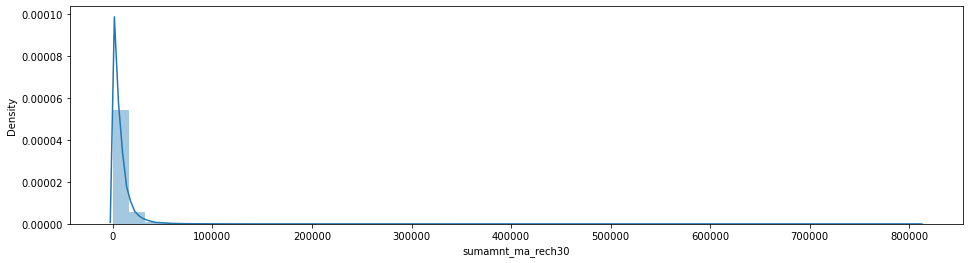

In [89]:
plt.figure(figsize=(16,4))
sns.distplot(df.sumamnt_ma_rech30)

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

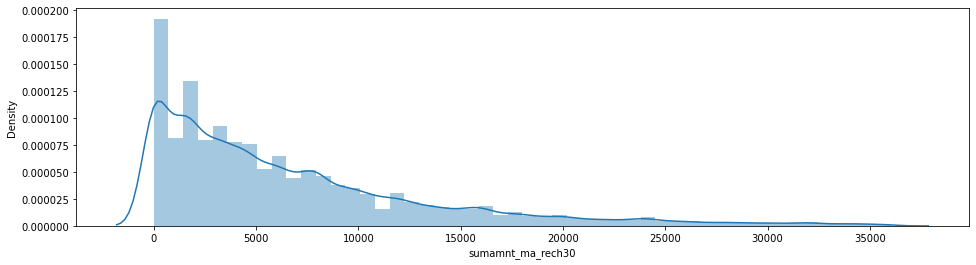

In [91]:
# result after removing the last 1 quantile of the data

plt.figure(figsize=(16,4))
sns.distplot(df[df.sumamnt_ma_rech30 < df.sumamnt_ma_rech30.quantile(0.98)]['sumamnt_ma_rech30'])

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

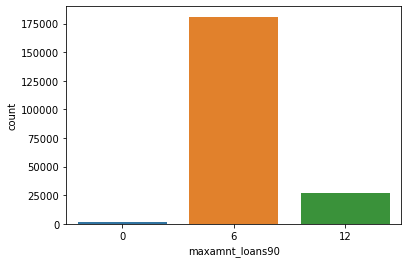

In [94]:
# max amount loans taken by the users
sns.countplot(df.maxamnt_loans90)
df.maxamnt_loans90.value_counts()

In [95]:
df.maxamnt_loans90.value_counts() / len(df) * 100

6     86.331605
12    12.693649
0      0.974746
Name: maxamnt_loans90, dtype: float64

In [96]:
df.payback90.describe()

count    209593.000000
mean          4.321485
std          10.308108
min           0.000000
25%           0.000000
50%           1.666667
75%           4.500000
max         171.500000
Name: payback90, dtype: float64

<AxesSubplot:xlabel='payback90', ylabel='Density'>

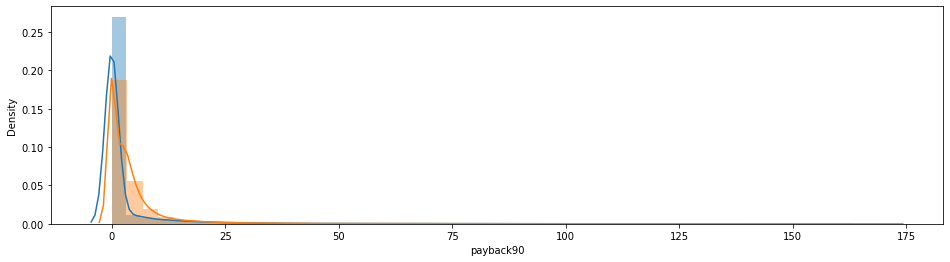

In [97]:
plt.figure(figsize=(16,4))
sns.distplot(df[df.label == 0].payback90)
sns.distplot(df[df.label == 1].payback90)

In [98]:
df[df.label == 0].payback90.sort_values()

104427      0.0
132692      0.0
132685      0.0
132666      0.0
132653      0.0
          ...  
155770    152.0
142811    152.5
89809     153.0
54909     153.5
171391    158.0
Name: payback90, Length: 26162, dtype: float64

In [99]:
## Bivariate Analysis

<AxesSubplot:xlabel='daily_decr90', ylabel='rental90'>

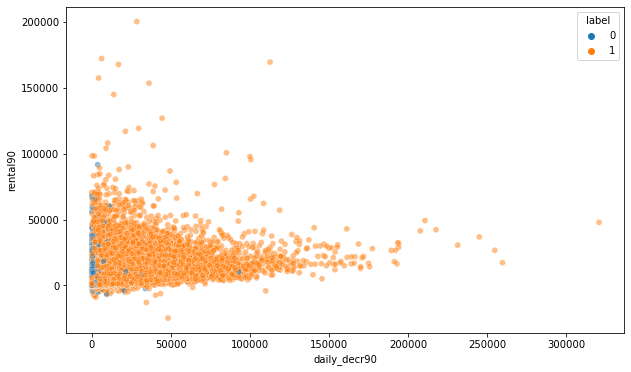

In [100]:
# DAY TO DAY usage vs BALANCE DEPRICIATION 
plt.figure(figsize=(10,6))
sns.scatterplot(df.daily_decr90,df.rental90,hue=df.label,alpha=0.5)

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='count'>

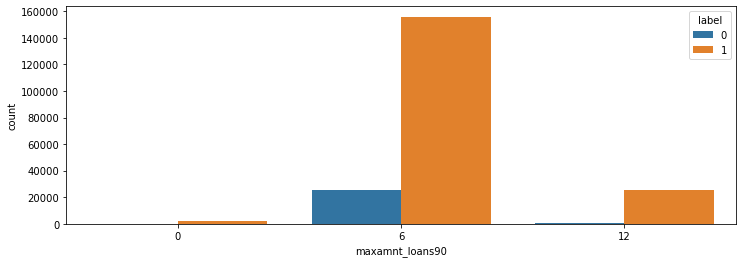

In [101]:
plt.figure(figsize=(12,4))
sns.countplot(df.maxamnt_loans90,hue=df.label)

In [102]:
df.iloc[:,2:-2].head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
1,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
2,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
3,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
4,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
5,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [24]:
# cluster analysis
from sklearn.cluster import AffinityPropagation,KMeans
cluster_analysis = KMeans(n_clusters=2)

In [25]:
df_cleaned = df.iloc[:,2:-2].copy()   # chck pt 1
df_cleaned['label'] = df.label

In [26]:
df_cleaned.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,label
1,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0
2,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,1
3,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,1
4,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,1
5,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,1


In [27]:
cluster_analysis.fit(df_cleaned.iloc[:,:-1])

KMeans(n_clusters=2)

In [28]:
cluster_analysis.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
clusters = np.unique(cluster_analysis.predict(df_cleaned.iloc[:,:-1]))
clusters

array([0, 1])

<AxesSubplot:xlabel='daily_decr90', ylabel='last_rech_amt_ma'>

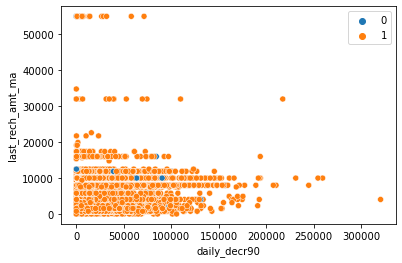

In [30]:
sns.scatterplot(df.daily_decr90,df.last_rech_amt_ma,hue=np.where(cluster_analysis.labels_ == 0,1,0))

<AxesSubplot:xlabel='daily_decr90', ylabel='last_rech_amt_ma'>

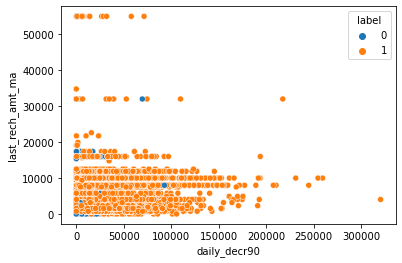

In [31]:
sns.scatterplot(df.daily_decr90,df.last_rech_amt_ma,hue=df.label)

In [32]:
#Dealing outliers

In [113]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   aon                   209593 non-null  float64
 1   daily_decr30          209593 non-null  float64
 2   daily_decr90          209593 non-null  float64
 3   rental30              209593 non-null  float64
 4   rental90              209593 non-null  float64
 5   last_rech_date_ma     209593 non-null  float64
 6   last_rech_date_da     209593 non-null  float64
 7   last_rech_amt_ma      209593 non-null  int64  
 8   cnt_ma_rech30         209593 non-null  int64  
 9   fr_ma_rech30          209593 non-null  float64
 10  sumamnt_ma_rech30     209593 non-null  float64
 11  medianamnt_ma_rech30  209593 non-null  float64
 12  medianmarechprebal30  209593 non-null  float64
 13  cnt_ma_rech90         209593 non-null  int64  
 14  fr_ma_rech90          209593 non-null  int64  
 15  

In [39]:
#Box Plot 
cont_var = []
dis_num_var = []
for col in df_cleaned.columns:
    if len(df_cleaned.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)

In [40]:
cont_var

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'payback30',
 'payback90']

In [41]:
dis_num_var

['maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'label']

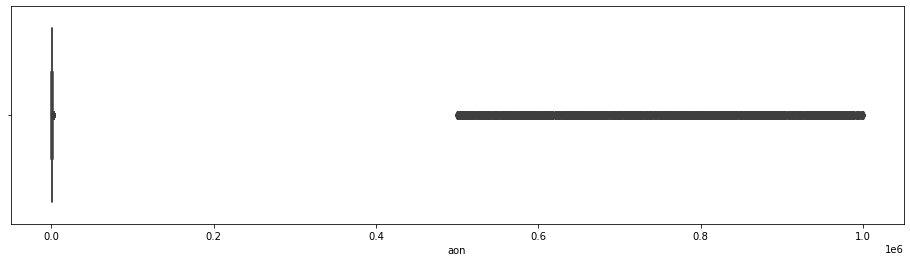

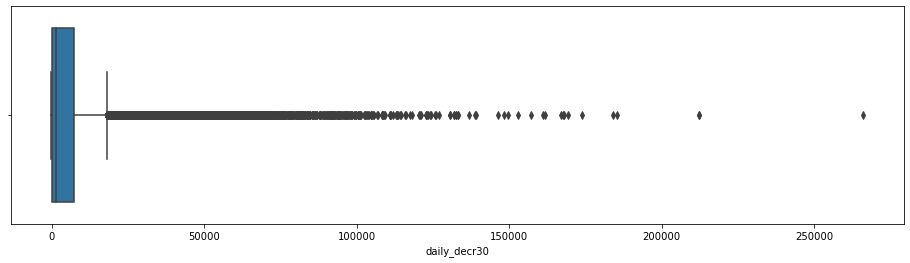

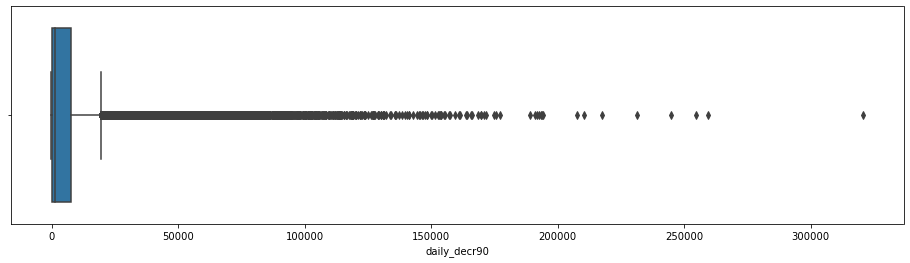

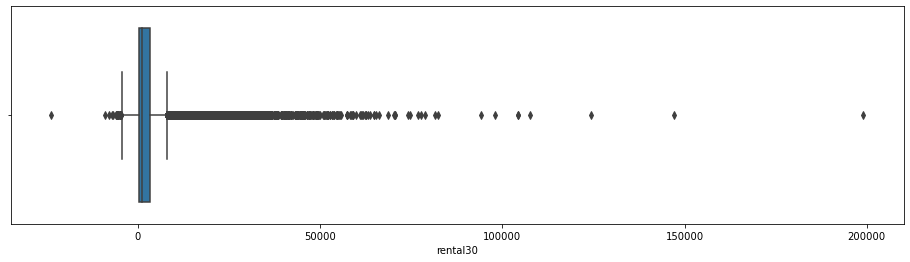

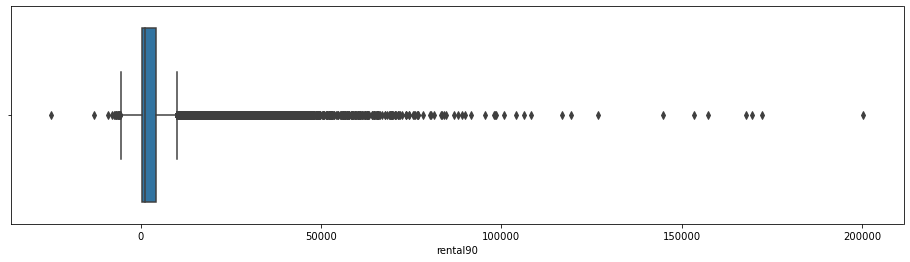

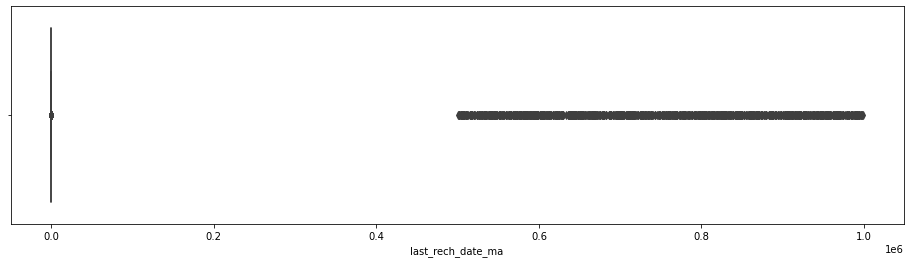

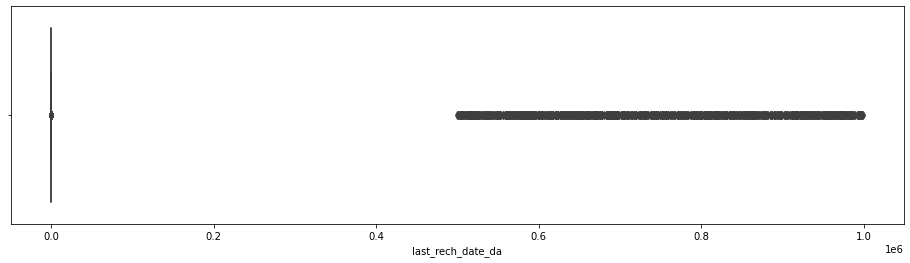

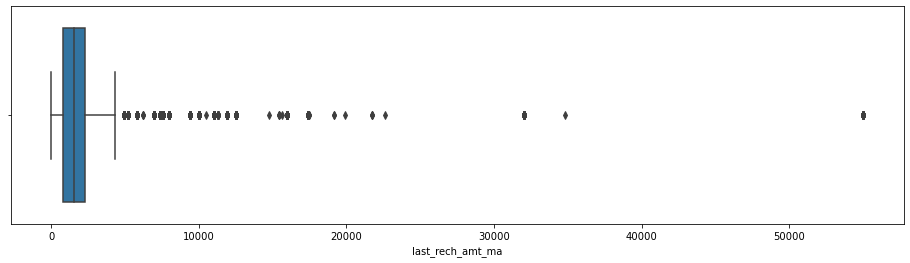

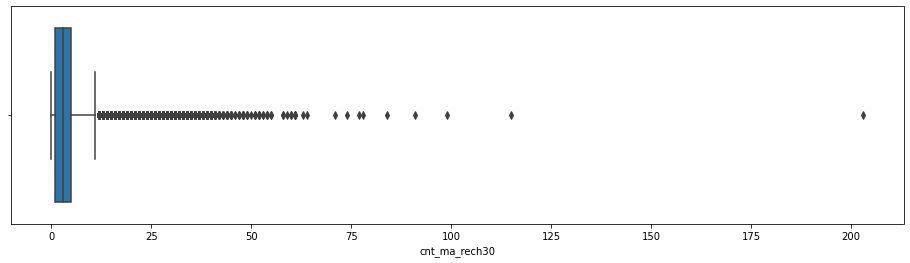

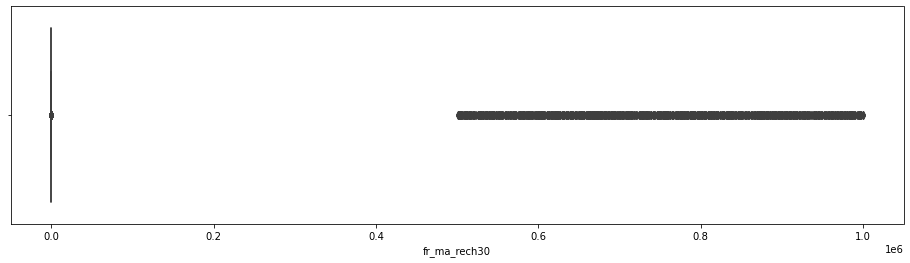

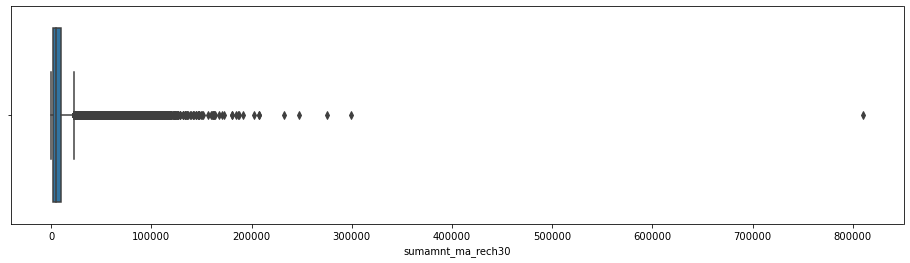

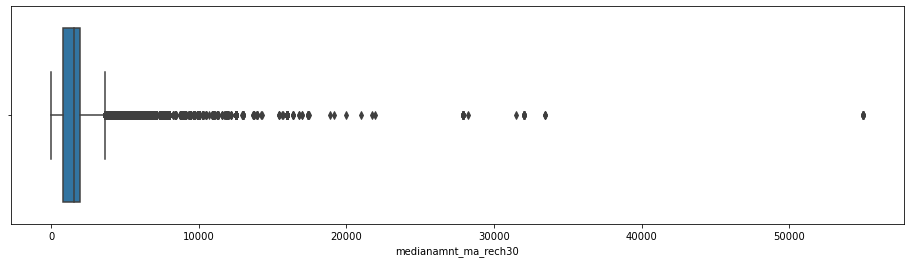

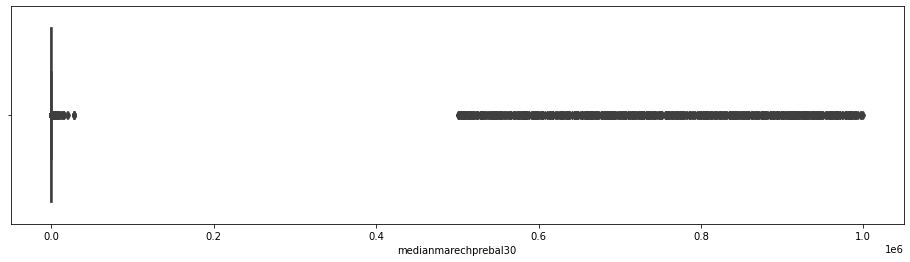

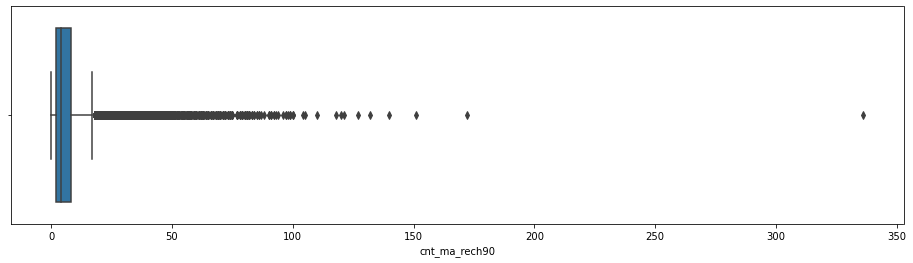

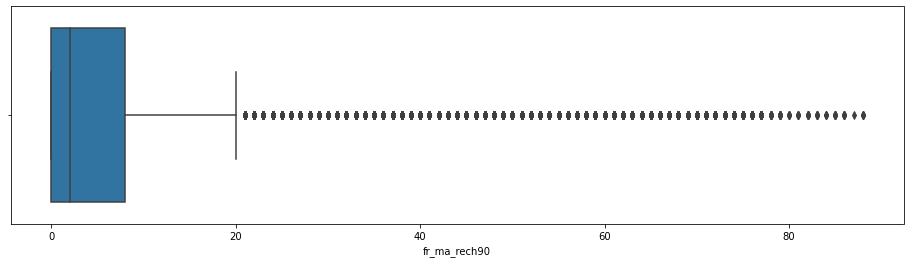

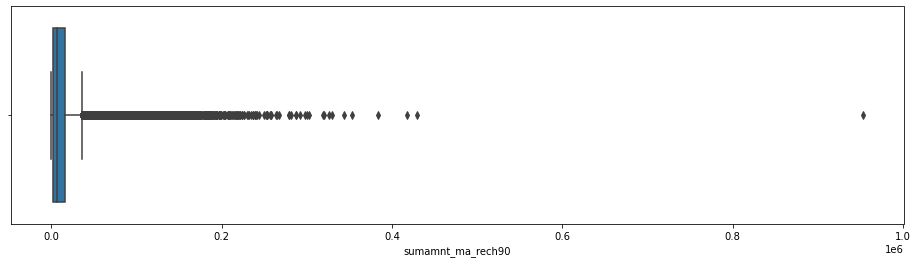

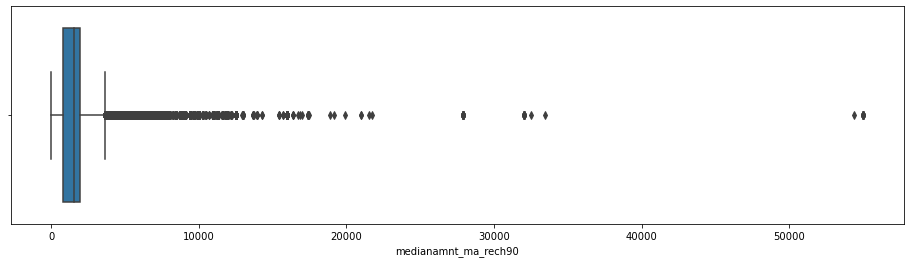

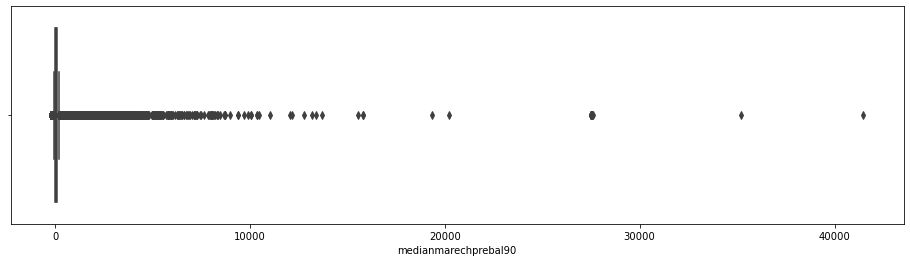

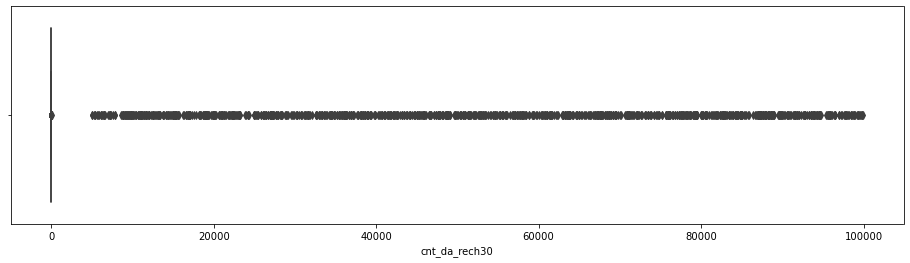

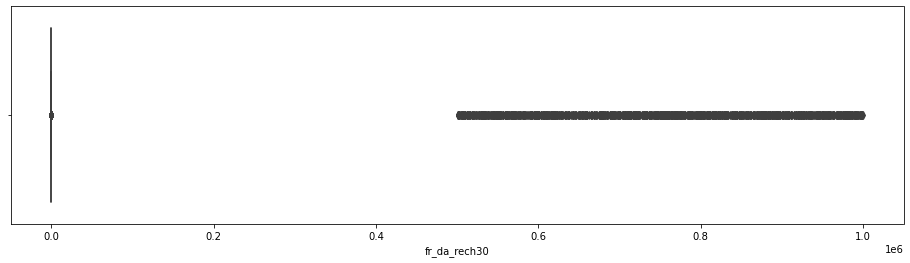

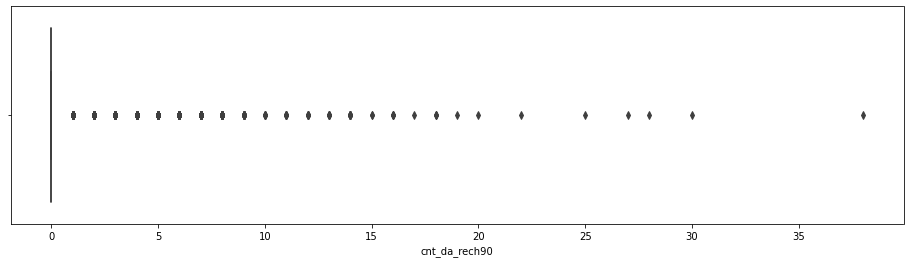

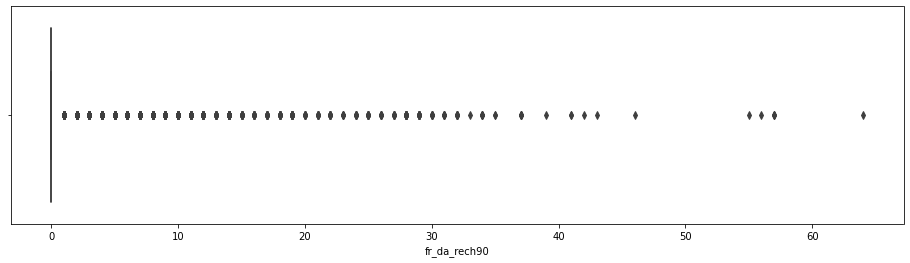

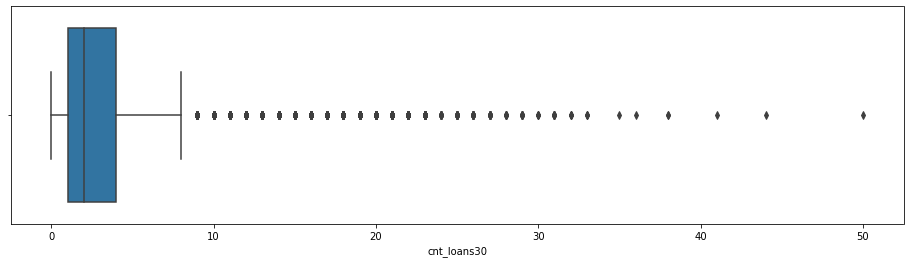

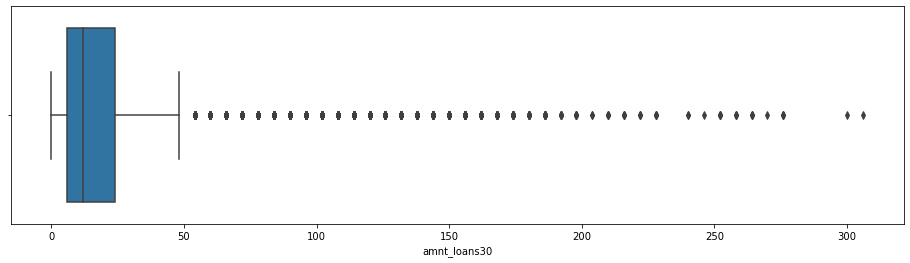

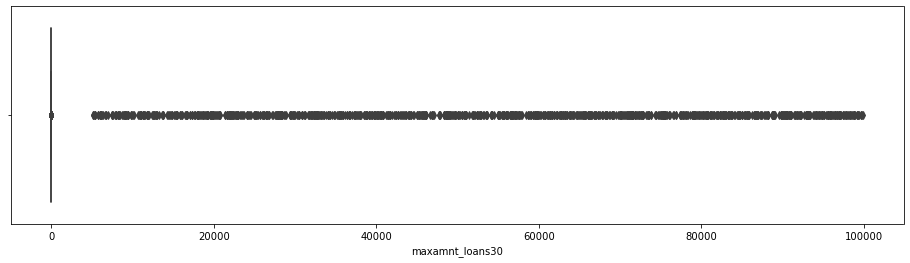

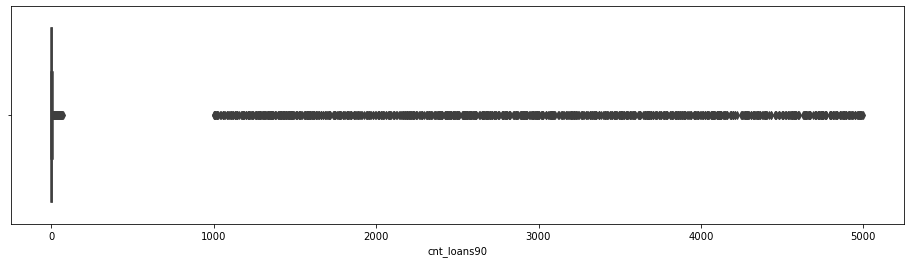

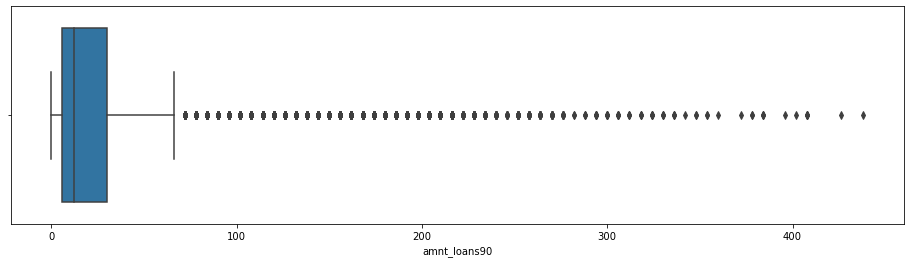

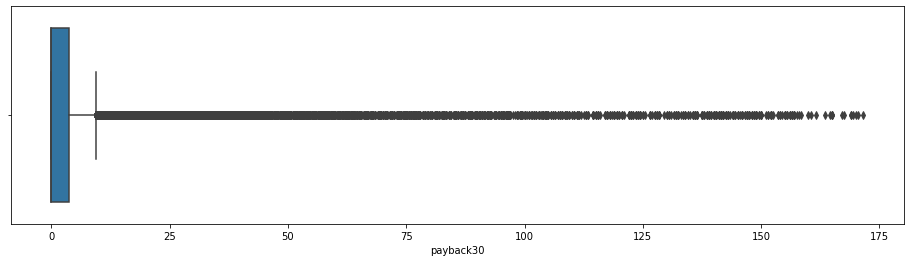

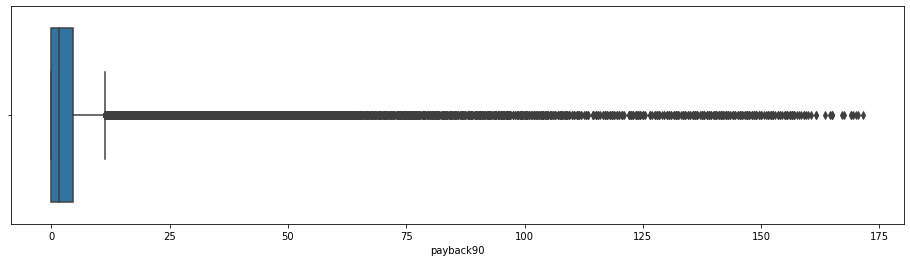

In [117]:
for col in cont_var:
    plt.figure(figsize=(16,4))
    sns.boxplot(df_cleaned[col])

In [118]:
df_cleaned[cont_var].skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
cnt_loans90             16.594408
amnt_loans90             3.150006
payback30                8.310695
payback90                6.899951
dtype: float64

In [120]:
df_cleaned.maxamnt_loans90.value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [121]:
df_cleaned.maxamnt_loans30.value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
                 ...  
26462.333521         1
53666.885900         1
67319.013426         1
36610.121211         1
28708.879352         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

In [119]:
# maxamnt_loans_30 have more than 10 values but lonas_90 has 3 ,must have outliers , let's check

In [122]:
df_cleaned[df_cleaned.maxamnt_loans30 > 20 ]

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,label
119,1454.0,19.578667,19.578667,148.88,148.88,1.0,0.0,770,4,5.0,3089.0,773.0,16.20,4,5,3089,773.0,16.20,0.0,0.0,0,0,5,30,61907.697372,0.0,5.0,30,6,0.0,3.500000,3.500000,1
126,811.0,166.796667,166.796667,-44.88,-44.88,4.0,0.0,2309,9,0.0,24442.0,1547.0,327.60,10,0,25989,1547.0,326.60,0.0,0.0,0,0,4,24,22099.413732,0.5,4.0,24,6,0.5,2.333333,2.333333,1
147,198.0,18301.000000,28936.470000,8634.10,11994.34,1.0,0.0,4048,5,11.0,24192.0,4048.0,171.00,17,3,88845,4048.0,233.00,0.0,0.0,0,0,2,12,98745.934048,0.5,8.0,48,6,0.0,2.500000,1.750000,1
370,1737.0,33.000000,33.000000,130.05,130.05,1.0,0.0,773,2,6.0,2320.0,1160.0,51.50,2,6,2320,1160.0,51.50,0.0,0.0,0,0,2,12,58925.364061,0.0,2.0,12,6,0.0,9.500000,9.500000,1
375,603.0,9970.000000,10770.000000,9343.38,15443.96,9.0,0.0,770,9,0.0,6930.0,770.0,149.40,10,0,7700,770.0,119.40,0.0,0.0,0,0,3,24,78232.464324,0.0,3.0,24,12,0.0,3.333333,32.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209190,1211.0,16039.000000,18645.190000,8391.52,11936.73,2.0,0.0,1539,5,3.0,8565.0,1539.0,60.90,11,8,17207,1539.0,15.90,0.0,0.0,0,0,5,60,50824.996349,1.0,11.0,96,12,1.0,5.400000,4.900000,1
209263,904.0,96.906667,96.906667,2516.20,2516.20,5.0,0.0,7526,2,10.0,15052.0,7526.0,200.22,2,10,15052,7526.0,200.22,0.0,0.0,0,0,1,6,17324.994582,0.0,1.0,6,6,0.0,0.000000,0.000000,1
209332,1846.0,55.680000,55.680000,1140.16,1140.16,5.0,0.0,2309,2,5.0,4618.0,2309.0,17.76,3,41,6338,2309.0,11.26,0.0,0.0,0,0,3,18,92864.501728,0.0,3.0,18,6,0.0,3.500000,3.500000,1
209393,1639.0,52.031333,52.031333,957.10,957.10,3.0,0.0,1539,6,2.0,4798.0,771.5,30.50,6,2,4798,771.5,30.50,0.0,0.0,0,0,6,36,54259.265687,0.0,6.0,36,6,0.0,3.800000,3.800000,1


In [33]:
# drop these 1047 samples
df_cleaned = df_cleaned[df_cleaned.maxamnt_loans30 < 20 ].copy()

In [34]:
df_cleaned.maxamnt_loans30.value_counts()

6.0     179193
12.0     26109
0.0       3244
Name: maxamnt_loans30, dtype: int64

In [125]:
dis_num_var

['medianamnt_loans30', 'maxamnt_loans90', 'medianamnt_loans90', 'label']

In [127]:
df_cleaned[df_cleaned.maxamnt_loans30 > 20 ]

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,label


In [35]:
z_scores = stats.zscore(df_cleaned.drop('label',1))

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_with_no_outliers = df_cleaned[filtered_entries]

In [36]:
len(df_with_no_outliers)

160511

In [37]:
data_loss =(len(df_cleaned) - len(df_with_no_outliers) )/ len(df_cleaned) * 100
data_loss

23.033287619997505

In [ ]:
## Building the Base Model

In [ ]:
# let's build a base model with all the features in it

In [133]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [135]:
# let's make a X and y split

In [136]:
X = df.iloc[:,2:-2].copy()
y = df.label

In [137]:
X.shape,y.shape

((209593, 32), (209593,))

In [75]:
from sklearn.model_selection import train_test_split

In [139]:
# stratified train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101,stratify = y)

In [76]:
def get_split_percentage(X,y):
    return X.join(y).label.value_counts() / len(X) * 100

In [141]:
get_split_percentage(X,y)

1    87.517713
0    12.482287
Name: label, dtype: float64

In [142]:
get_split_percentage(X_train,y_train)

1    87.517977
0    12.482023
Name: label, dtype: float64

In [143]:
get_split_percentage(X_test,y_test)

1    87.517097
0    12.482903
Name: label, dtype: float64

In [77]:
# The class imbalance is high ,We will use AOC for detemrnination
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

In [78]:
#Reusbale Func
def train_n_ret_score(model):
    model.fit(X_train,y_train)
    return roc_auc_score(y_test,model.predict(X_test)),f1_score(y_test,model.predict(X_test))

In [79]:
# let's importing all the model 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [147]:
train_n_ret_score(LogisticRegression())

(0.5775248235956597, 0.9282653283875192)

In [148]:
train_n_ret_score(DecisionTreeClassifier())

(0.7086420937883686, 0.9240241911208006)

In [149]:
train_n_ret_score(RandomForestClassifier()) # best base score model

(0.7114707972194863, 0.9519138312793868)

In [150]:
train_n_ret_score(GaussianNB())

(0.692262030193598, 0.6603287874615357)

In [152]:
 # best base score model : Random Forset 

In [157]:
#let's try skew transforations and then remove the outliers

 # log transforation cant be used as its having Os

In [176]:
df_cleaned.shape

(208546, 33)

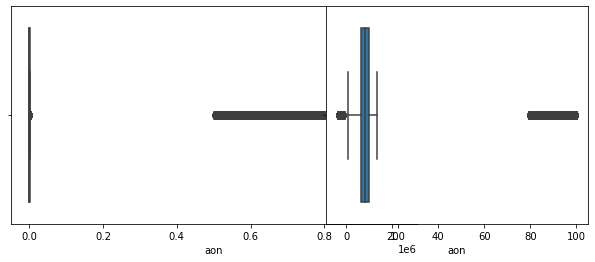

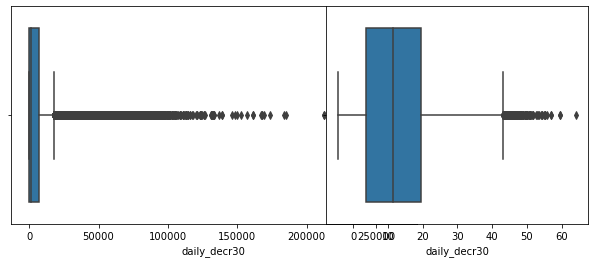

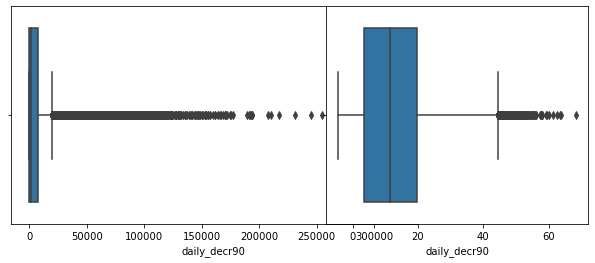

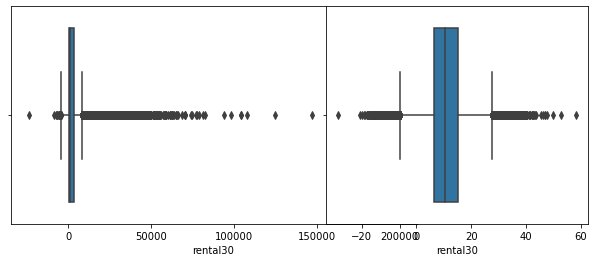

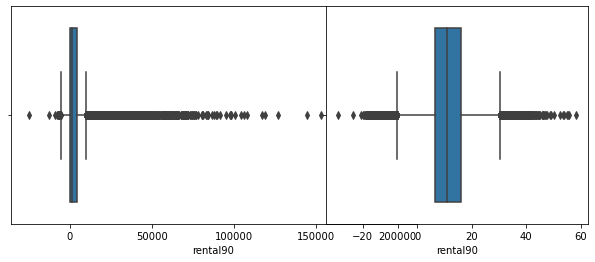

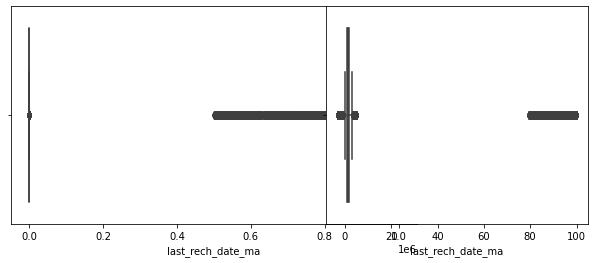

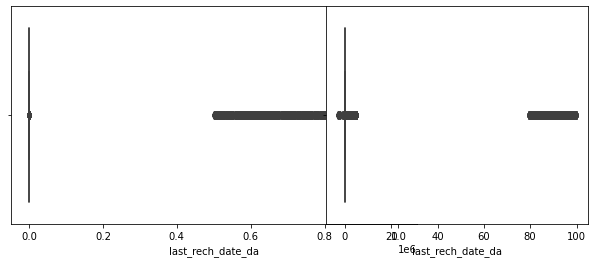

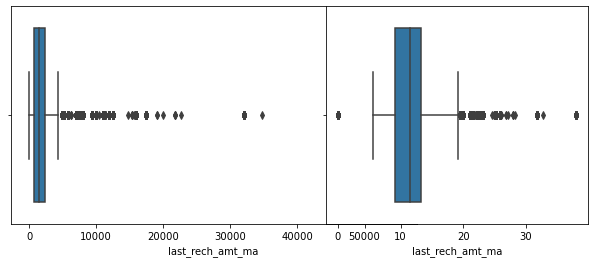

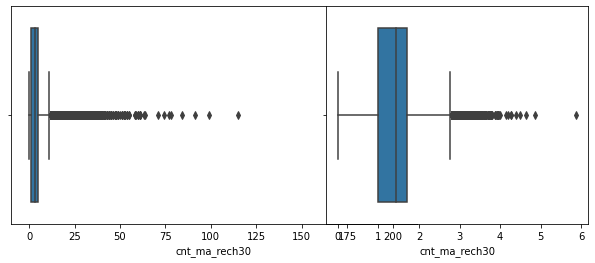

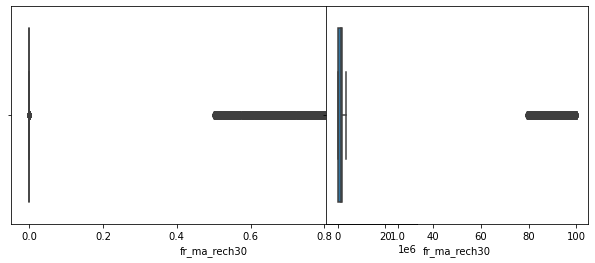

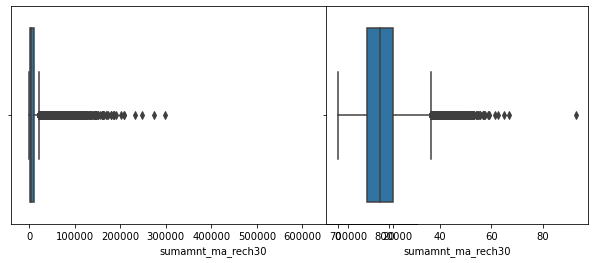

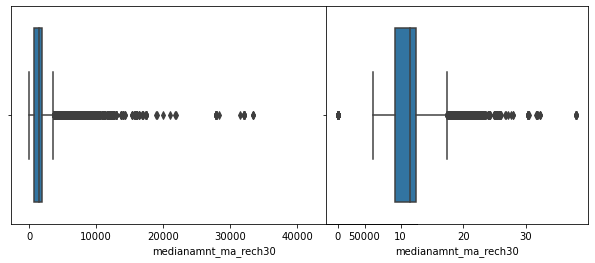

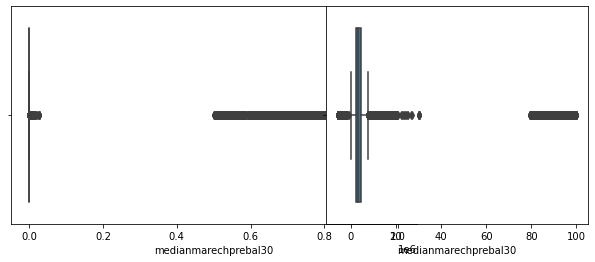

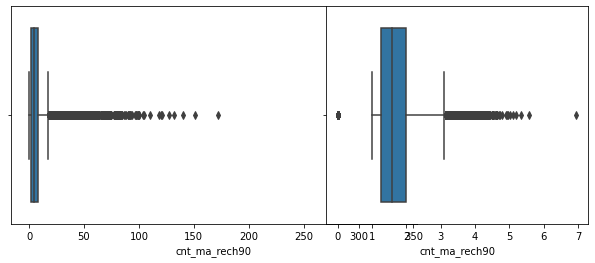

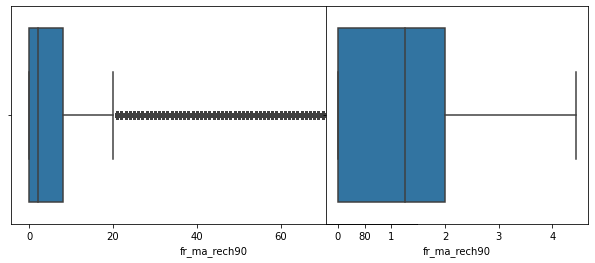

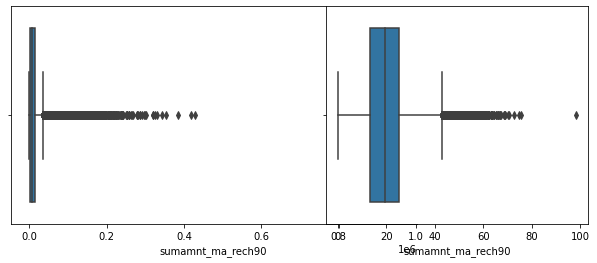

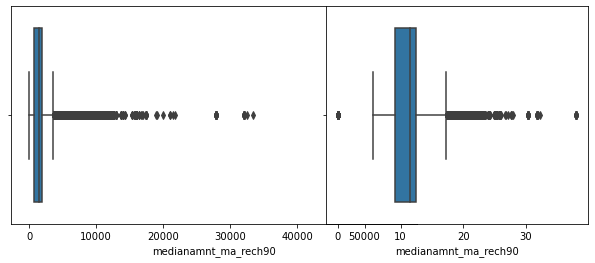

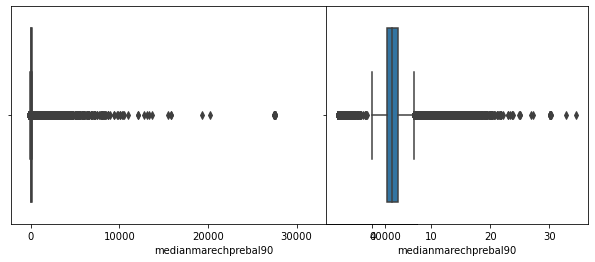

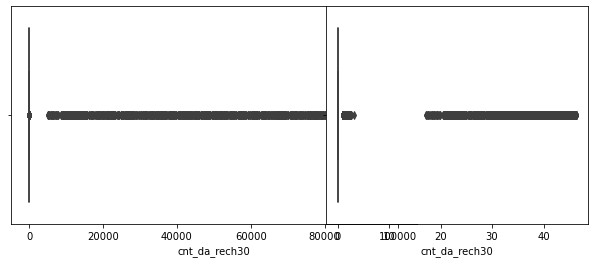

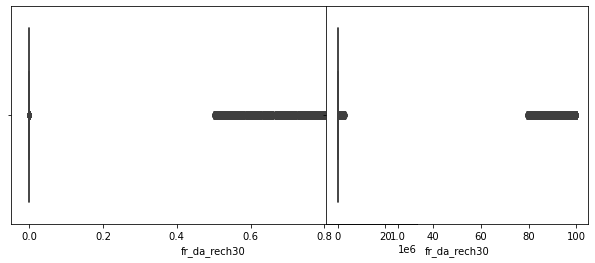

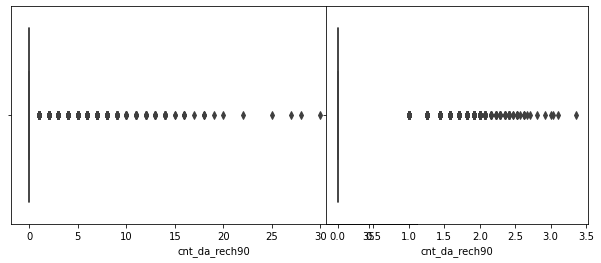

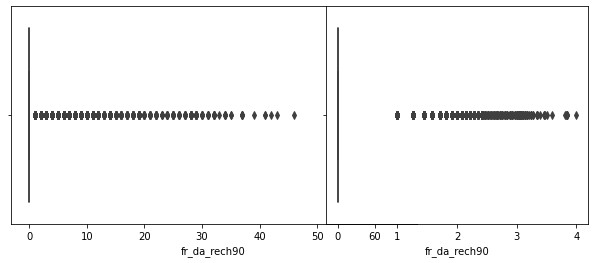

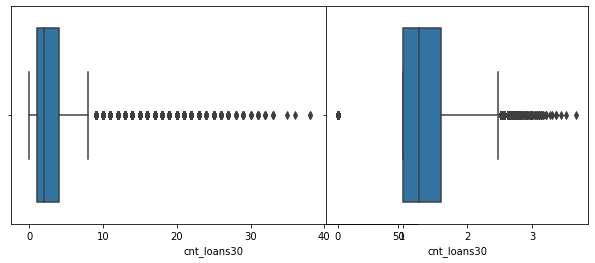

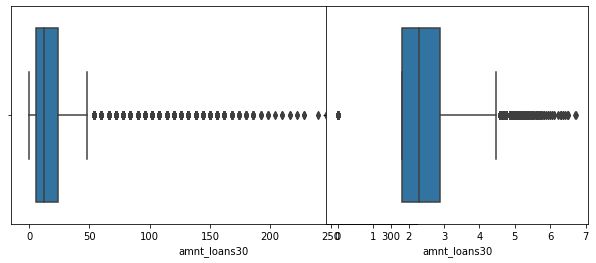

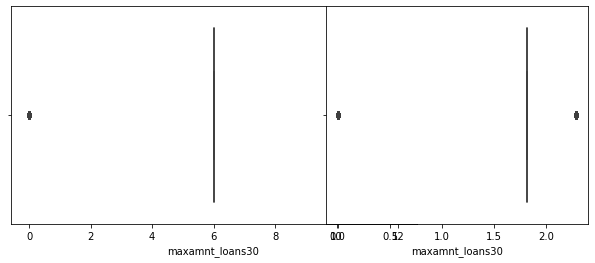

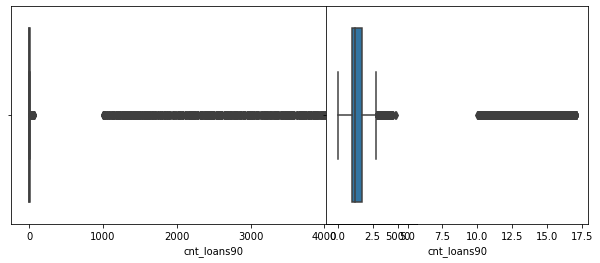

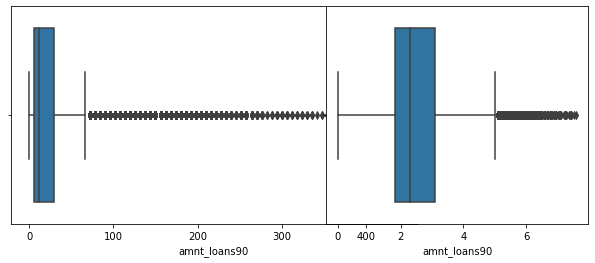

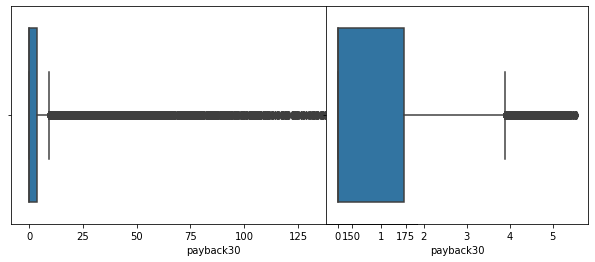

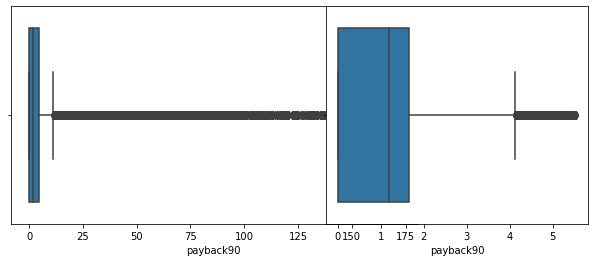

In [156]:
for col in cont_var:
    fig = plt.figure(figsize=(16,4))
    
    fig.add_subplot(121)
    sns.boxplot(df_cleaned[col])
    
    fig.add_subplot(132)
    sns.boxplot(np.cbrt(df_cleaned[col])) 

In [42]:
df_new = np.cbrt(df_cleaned[cont_var])  # chck pt 2


In [43]:
df_new.shape

(208546, 28)

In [44]:
df_new = df_new.join(df_cleaned[dis_num_var])

In [180]:
df_new.isna().mean()

aon                     0.0
daily_decr30            0.0
daily_decr90            0.0
rental30                0.0
rental90                0.0
last_rech_date_ma       0.0
last_rech_date_da       0.0
last_rech_amt_ma        0.0
cnt_ma_rech30           0.0
fr_ma_rech30            0.0
sumamnt_ma_rech30       0.0
medianamnt_ma_rech30    0.0
medianmarechprebal30    0.0
cnt_ma_rech90           0.0
fr_ma_rech90            0.0
sumamnt_ma_rech90       0.0
medianamnt_ma_rech90    0.0
medianmarechprebal90    0.0
cnt_da_rech30           0.0
fr_da_rech30            0.0
cnt_da_rech90           0.0
fr_da_rech90            0.0
cnt_loans30             0.0
amnt_loans30            0.0
maxamnt_loans30         0.0
cnt_loans90             0.0
amnt_loans90            0.0
payback30               0.0
payback90               0.0
medianamnt_loans30      0.0
maxamnt_loans90         0.0
medianamnt_loans90      0.0
label                   0.0
dtype: float64

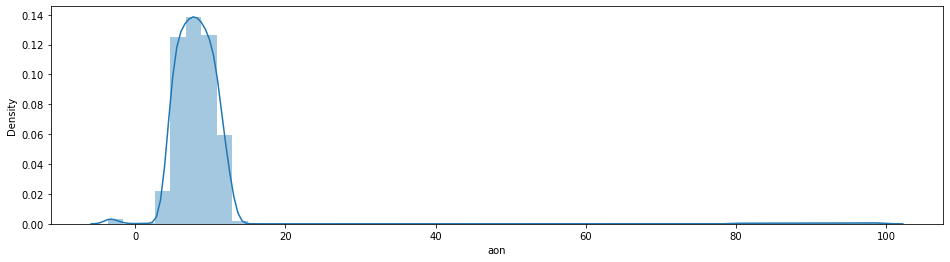

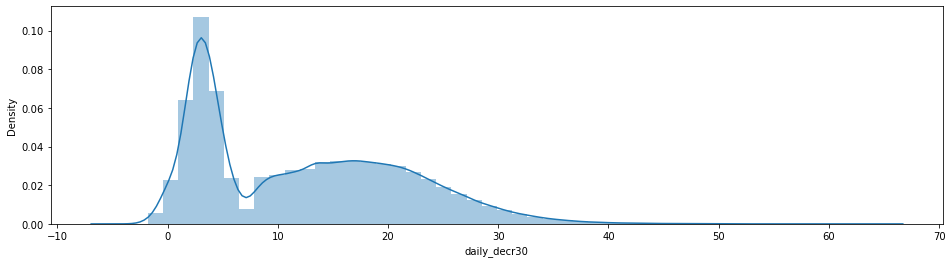

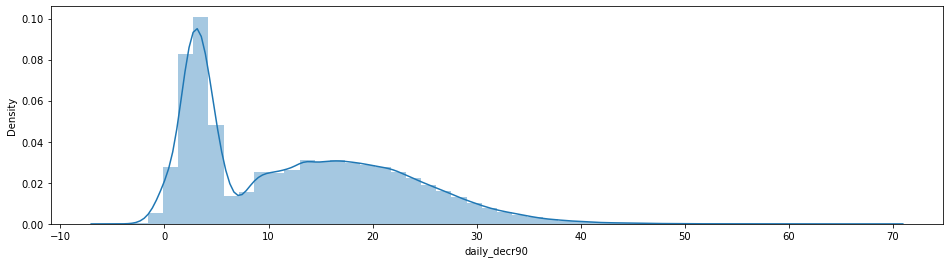

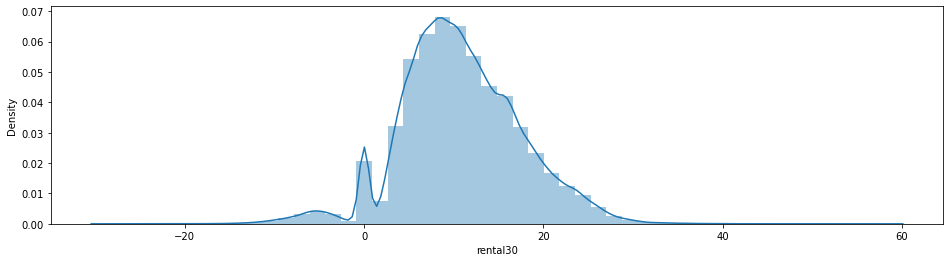

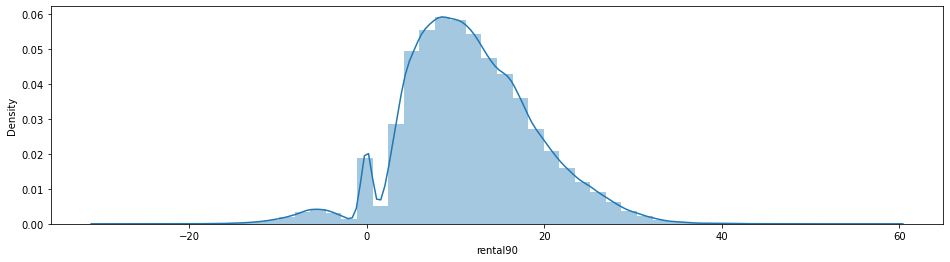

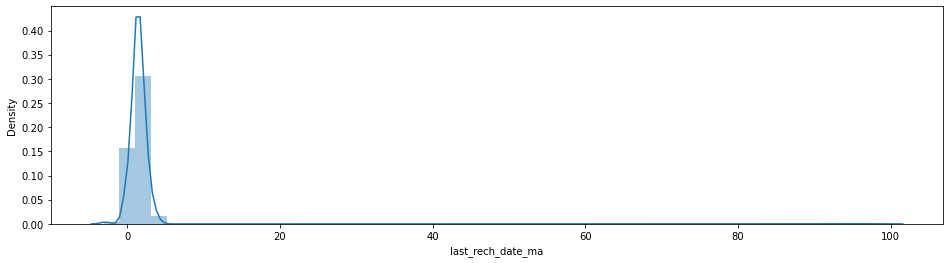

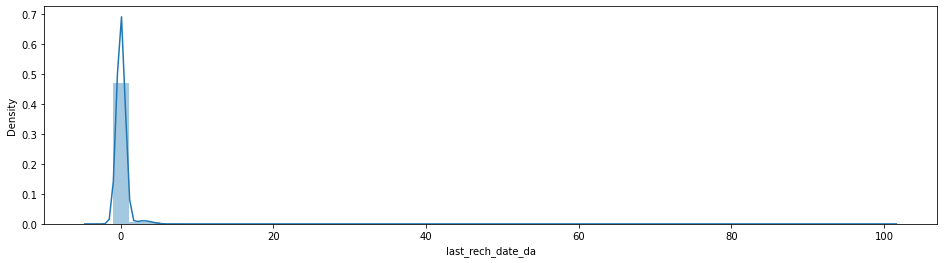

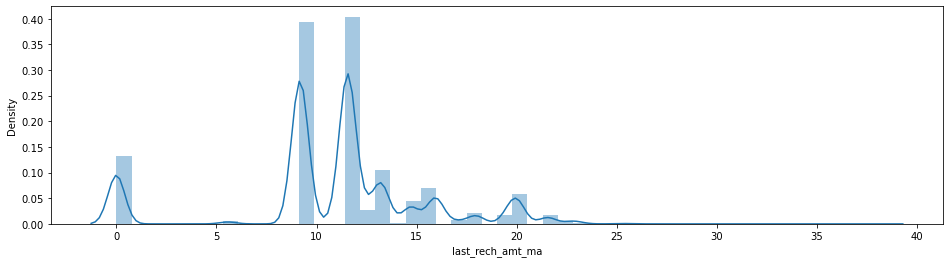

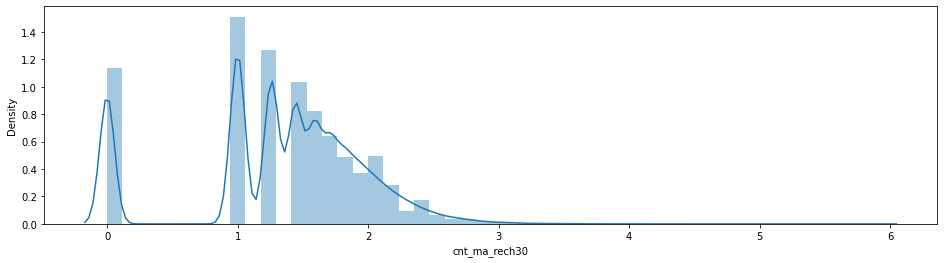

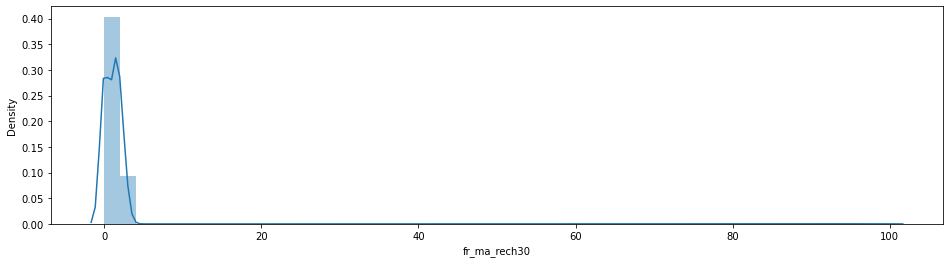

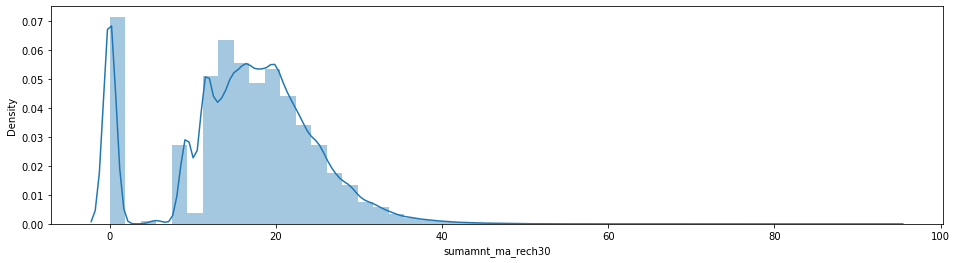

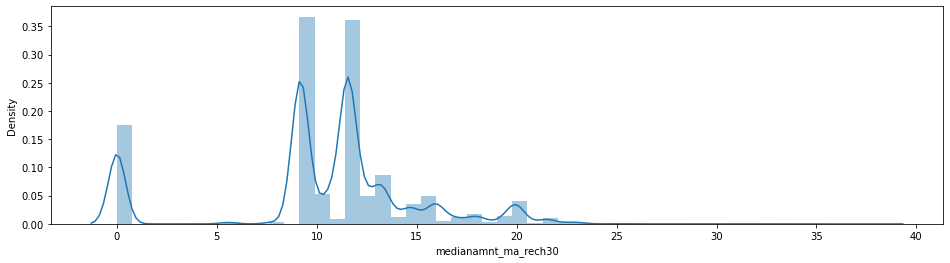

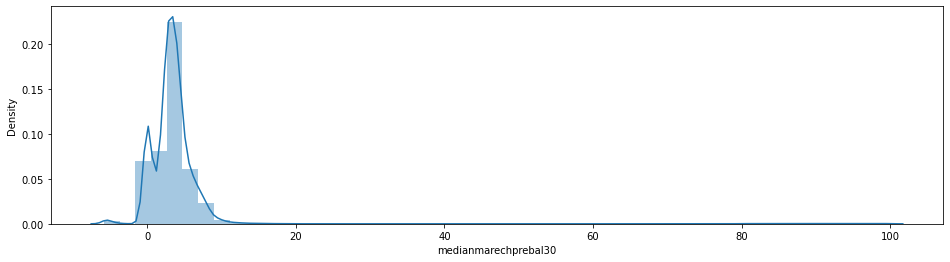

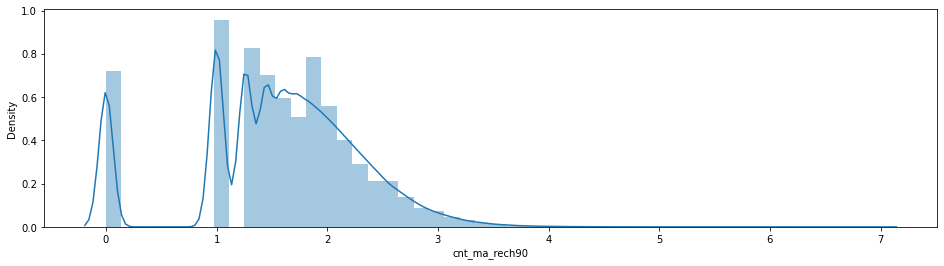

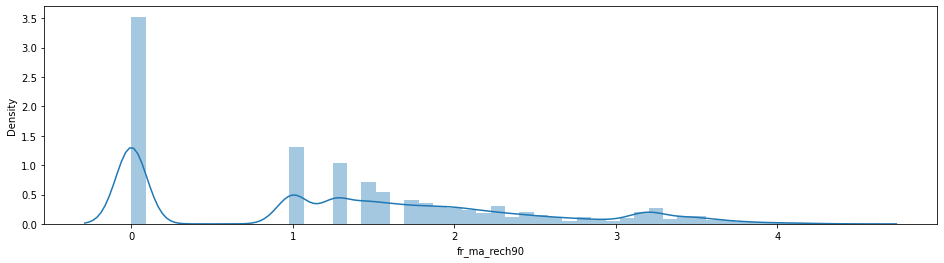

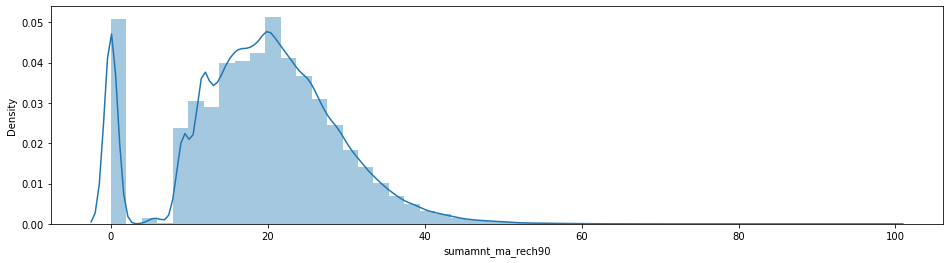

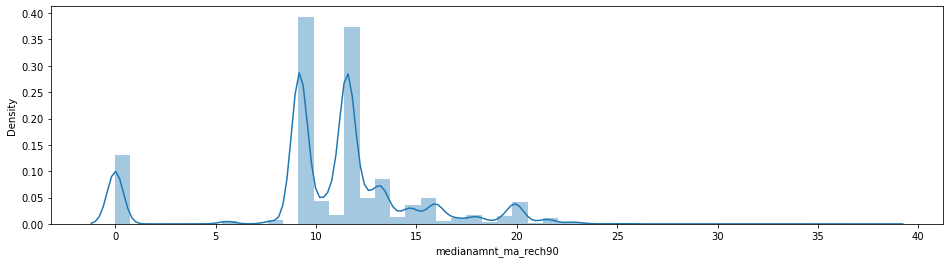

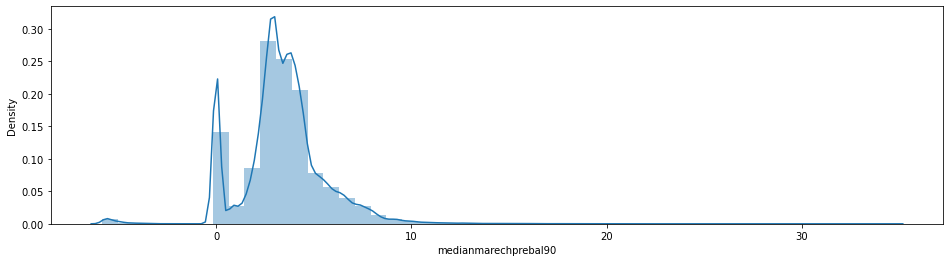

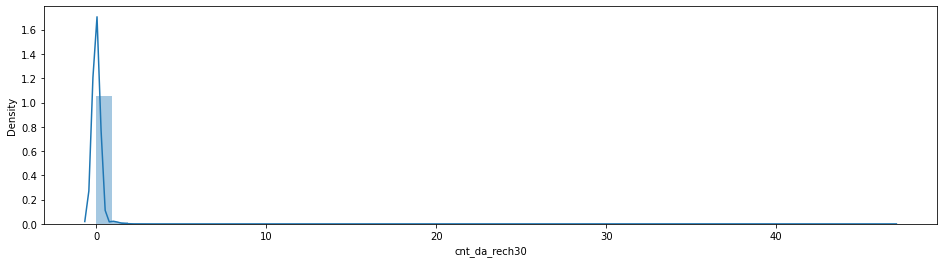

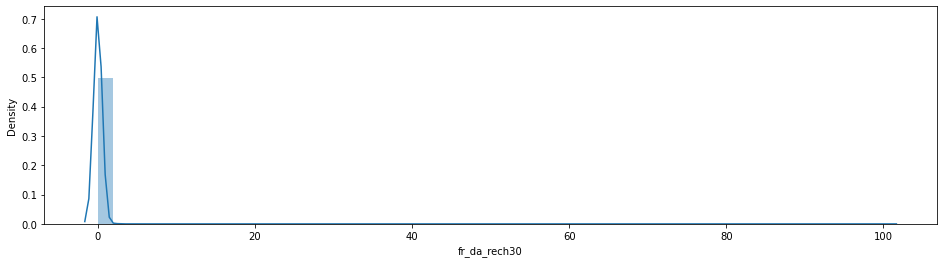

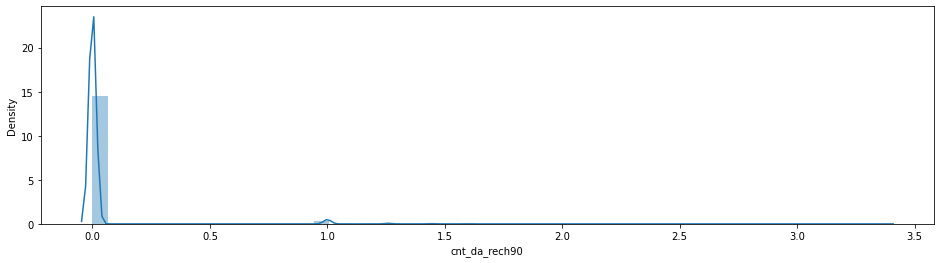

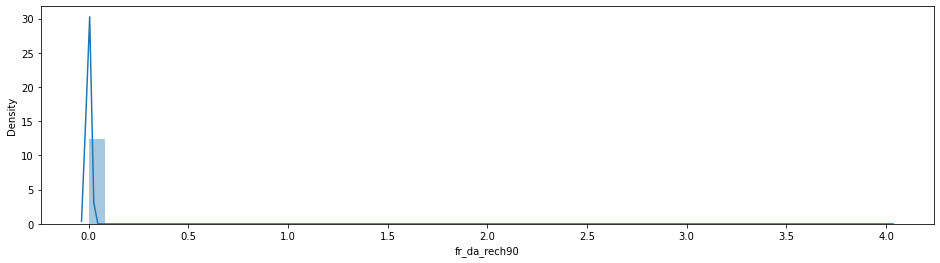

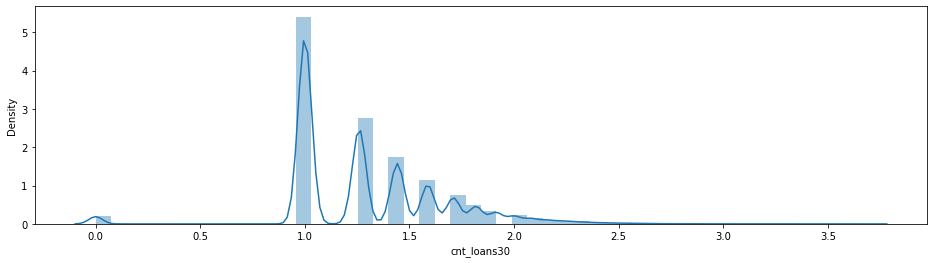

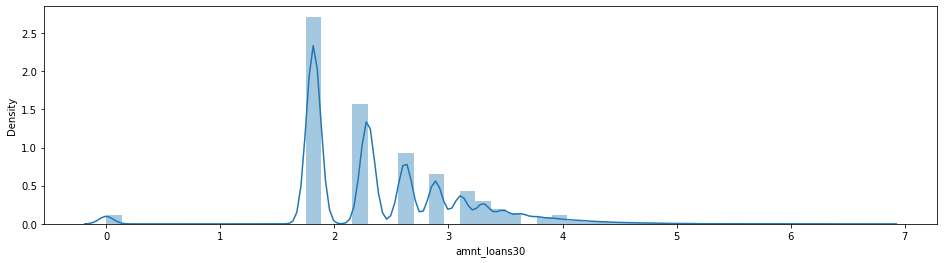

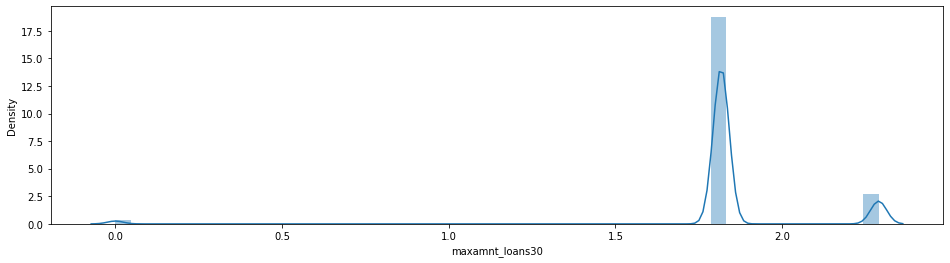

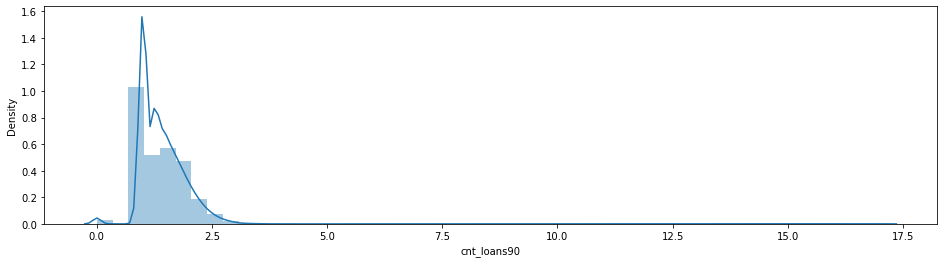

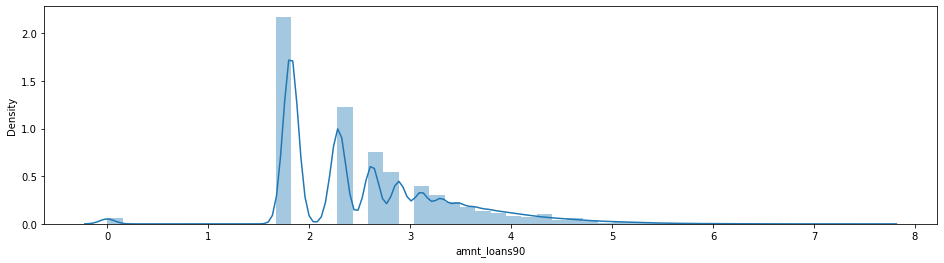

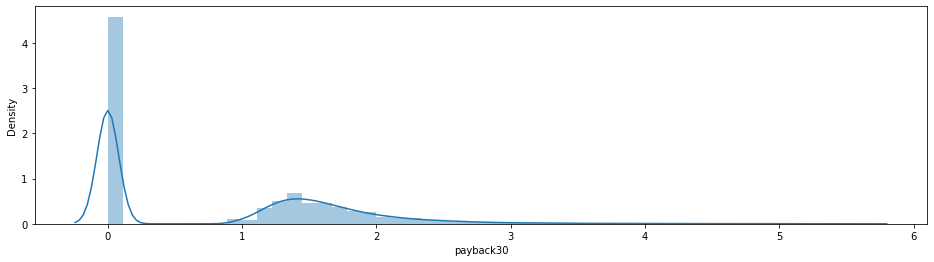

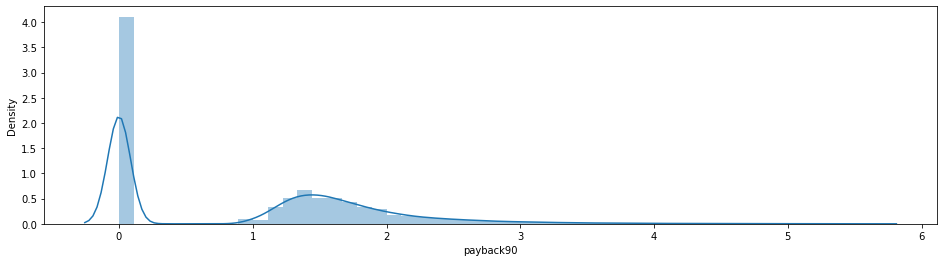

In [182]:
for col in cont_var:
    plt.figure(figsize=(16,4))
    sns.distplot(df_new[col])

In [185]:
dis_num_var

['medianamnt_loans30', 'maxamnt_loans90', 'medianamnt_loans90', 'label']

In [183]:
# let's now see the outcome of the z-score on this dataset
z_scores = stats.zscore(df_new[cont_var])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_with_no_outliers = df_cleaned[filtered_entries]

In [186]:
(len(df_new) - len(df_with_no_outliers) )/ len(df_cleaned) * 100

12.649966913774419

In [187]:
## NOT applicatble need more tuning 

In [188]:
data_features = df_new[['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90']].copy()

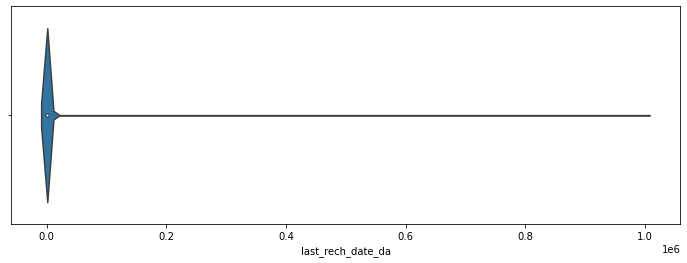

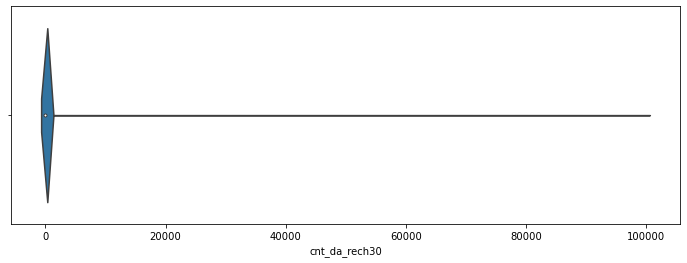

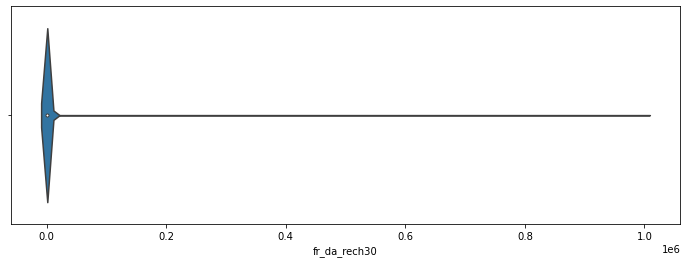

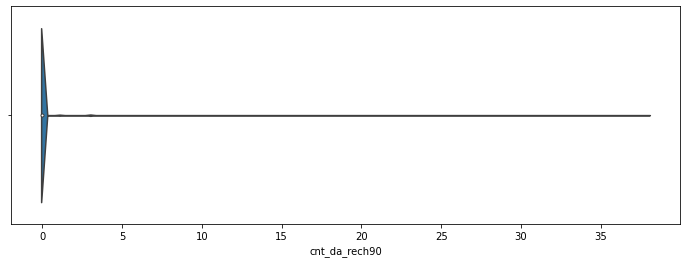

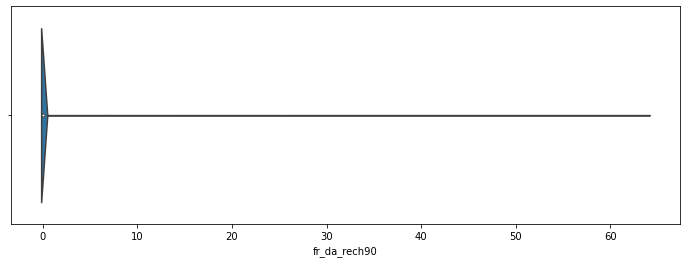

In [163]:
for i in data_features:
    plt.figure(figsize=(12,4))
    sns.violinplot(df[i])

In [189]:
df_new.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90,medianamnt_loans30,maxamnt_loans90,medianamnt_loans90,label
1,6.479224,14.510179,14.526152,6.038000,6.383568,1.259921,0.0,11.545503,1.259921,2.758924,14.546423,11.545503,1.957434,1.259921,2.758924,14.546423,11.545503,1.957434,0.0,0.0,0.0,0.0,1.259921,2.289428,1.817121,1.259921,2.289428,3.072317,3.072317,0.0,6,0.0,0
2,8.929490,22.971610,22.973347,15.454616,15.454616,2.714418,0.0,17.953584,1.000000,0.000000,17.953584,17.953584,3.937357,1.000000,0.000000,17.953584,17.953584,3.937357,0.0,0.0,0.0,0.0,1.000000,2.289428,2.289428,1.000000,2.289428,0.000000,0.000000,0.0,12,0.0,1
3,8.118041,11.181560,11.181560,9.655359,9.655359,1.442250,0.0,11.545503,1.000000,0.000000,11.545503,11.545503,4.047761,1.000000,0.000000,11.545503,11.545503,4.047761,0.0,0.0,0.0,0.0,1.000000,1.817121,1.817121,1.000000,1.817121,0.000000,0.000000,0.0,6,0.0,1
4,6.223084,2.768873,2.768873,5.422267,5.422267,3.448217,0.0,9.820117,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.820117,9.820117,1.357209,0.0,0.0,0.0,0.0,1.259921,2.289428,1.817121,1.259921,2.289428,0.000000,0.000000,0.0,6,0.0,1
5,9.820117,5.320595,5.320595,10.319359,10.319359,1.587401,0.0,13.217256,1.912931,1.259921,27.157290,13.217256,3.072317,2.000000,1.259921,28.641646,14.240735,3.271066,0.0,0.0,0.0,0.0,1.912931,3.476027,1.817121,1.912931,3.476027,1.326352,1.326352,0.0,6,0.0,1


In [45]:
len(df_new.columns)

33

In [46]:
df_new.drop(['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90'],1,inplace=True)

In [47]:
len(df_new.columns)

28

In [50]:
df.shape 

(209593, 36)

In [49]:
df_cleaned.shape

(208546, 33)

In [48]:
df_new.shape

(208546, 28)

In [51]:
cont_var = []
dis_num_var = []
for col in df_new.columns:
    if len(df_new.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)

In [198]:
cont_var

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans30',
 'amnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'payback30',
 'payback90']

In [ ]:
# Based on visualizations.pmiiting sime outliers

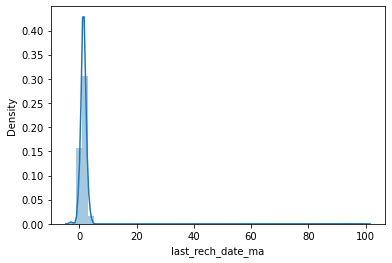

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

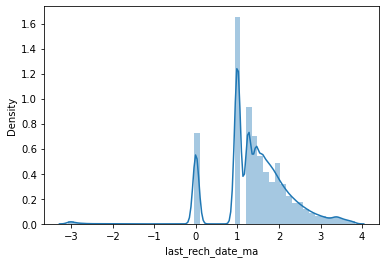

In [52]:
# last_rech_date_ma
sns.distplot(df_new.last_rech_date_ma)
plt.show()
# let's strip of the last 1 quantile of the data
sns.distplot(df_new[df_new.last_rech_date_ma < df_new.last_rech_date_ma.quantile(0.99)]['last_rech_date_ma'])

In [53]:
#As by removing 1 percent we see a goo change
df_new = df_new[df_new.last_rech_date_ma < df_new.last_rech_date_ma.quantile(0.99)]

In [1]:
#removing Columns whivh have neglible variation 

In [54]:
df_new.iloc[:,:-1].head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90,maxamnt_loans30,medianamnt_loans30,maxamnt_loans90,medianamnt_loans90
1,6.479224,14.510179,14.526152,6.038000,6.383568,1.259921,11.545503,1.259921,2.758924,14.546423,11.545503,1.957434,1.259921,2.758924,14.546423,11.545503,1.957434,1.259921,2.289428,1.259921,2.289428,3.072317,3.072317,6.0,0.0,6,0.0
2,8.929490,22.971610,22.973347,15.454616,15.454616,2.714418,17.953584,1.000000,0.000000,17.953584,17.953584,3.937357,1.000000,0.000000,17.953584,17.953584,3.937357,1.000000,2.289428,1.000000,2.289428,0.000000,0.000000,12.0,0.0,12,0.0
3,8.118041,11.181560,11.181560,9.655359,9.655359,1.442250,11.545503,1.000000,0.000000,11.545503,11.545503,4.047761,1.000000,0.000000,11.545503,11.545503,4.047761,1.000000,1.817121,1.000000,1.817121,0.000000,0.000000,6.0,0.0,6,0.0
4,6.223084,2.768873,2.768873,5.422267,5.422267,3.448217,9.820117,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.820117,9.820117,1.357209,1.259921,2.289428,1.259921,2.289428,0.000000,0.000000,6.0,0.0,6,0.0
5,9.820117,5.320595,5.320595,10.319359,10.319359,1.587401,13.217256,1.912931,1.259921,27.157290,13.217256,3.072317,2.000000,1.259921,28.641646,14.240735,3.271066,1.912931,3.476027,1.912931,3.476027,1.326352,1.326352,6.0,0.0,6,0.0


In [55]:
df_new.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90,maxamnt_loans30,medianamnt_loans30,maxamnt_loans90,medianamnt_loans90,label
1,6.479224,14.510179,14.526152,6.038000,6.383568,1.259921,11.545503,1.259921,2.758924,14.546423,11.545503,1.957434,1.259921,2.758924,14.546423,11.545503,1.957434,1.259921,2.289428,1.259921,2.289428,3.072317,3.072317,6.0,0.0,6,0.0,0
2,8.929490,22.971610,22.973347,15.454616,15.454616,2.714418,17.953584,1.000000,0.000000,17.953584,17.953584,3.937357,1.000000,0.000000,17.953584,17.953584,3.937357,1.000000,2.289428,1.000000,2.289428,0.000000,0.000000,12.0,0.0,12,0.0,1
3,8.118041,11.181560,11.181560,9.655359,9.655359,1.442250,11.545503,1.000000,0.000000,11.545503,11.545503,4.047761,1.000000,0.000000,11.545503,11.545503,4.047761,1.000000,1.817121,1.000000,1.817121,0.000000,0.000000,6.0,0.0,6,0.0,1
4,6.223084,2.768873,2.768873,5.422267,5.422267,3.448217,9.820117,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.820117,9.820117,1.357209,1.259921,2.289428,1.259921,2.289428,0.000000,0.000000,6.0,0.0,6,0.0,1
5,9.820117,5.320595,5.320595,10.319359,10.319359,1.587401,13.217256,1.912931,1.259921,27.157290,13.217256,3.072317,2.000000,1.259921,28.641646,14.240735,3.271066,1.912931,3.476027,1.912931,3.476027,1.326352,1.326352,6.0,0.0,6,0.0,1


In [56]:
for i in range(df_new.iloc[:,:-1].shape[1]): # removing the label from the loop 
    num = len(np.unique(df_new.iloc[:, i]))
    percentage = float(num) / df_new.shape[0] * 100
    print('%d, %d, %.1f%%' % (i, num, percentage))

0, 4478, 2.2%
1, 145437, 70.5%
2, 156795, 76.0%
3, 130870, 63.4%
4, 139585, 67.6%
5, 86, 0.0%
6, 70, 0.0%
7, 70, 0.0%
8, 1070, 0.5%
9, 15045, 7.3%
10, 508, 0.2%
11, 30233, 14.6%
12, 109, 0.1%
13, 89, 0.0%
14, 31597, 15.3%
15, 606, 0.3%
16, 29504, 14.3%
17, 40, 0.0%
18, 48, 0.0%
19, 1092, 0.5%
20, 69, 0.0%
21, 1358, 0.7%
22, 2374, 1.1%
23, 3, 0.0%
24, 6, 0.0%
25, 3, 0.0%
26, 6, 0.0%


In [57]:
a2 = []
for i in range(df_new.iloc[:,:-1].shape[1]):
    num = len(np.unique(df_new.iloc[:, i]))
    percentage = float(num) / df_new.shape[0] * 100
    print('%d, %d, %.1f%%' % (i, num, percentage))
    a2.append(percentage)

0, 4478, 2.2%
1, 145437, 70.5%
2, 156795, 76.0%
3, 130870, 63.4%
4, 139585, 67.6%
5, 86, 0.0%
6, 70, 0.0%
7, 70, 0.0%
8, 1070, 0.5%
9, 15045, 7.3%
10, 508, 0.2%
11, 30233, 14.6%
12, 109, 0.1%
13, 89, 0.0%
14, 31597, 15.3%
15, 606, 0.3%
16, 29504, 14.3%
17, 40, 0.0%
18, 48, 0.0%
19, 1092, 0.5%
20, 69, 0.0%
21, 1358, 0.7%
22, 2374, 1.1%
23, 3, 0.0%
24, 6, 0.0%
25, 3, 0.0%
26, 6, 0.0%


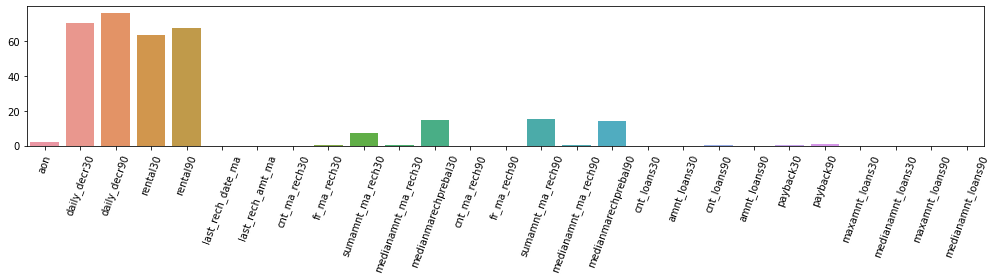

In [58]:
plt.figure(figsize=(14,4))
sns.barplot(df_new.iloc[:,:-1].columns,a2)
plt.xticks(rotation=70)
plt.tight_layout()

In [59]:
df_new.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90', 'maxamnt_loans30', 'medianamnt_loans30',
       'maxamnt_loans90', 'medianamnt_loans90', 'label'],
      dtype='object')

In [60]:
cont_var = []
dis_num_var = []
for col in df_new.columns:
    if len(df_new.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)

In [61]:
cont_var

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans30',
 'amnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'payback30',
 'payback90']

In [62]:
dis_num_var

['maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'label']

In [64]:
df_new


,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90,maxamnt_loans30,medianamnt_loans30,maxamnt_loans90,medianamnt_loans90,label
1,6.479224,14.510179,14.526152,6.038000,6.383568,1.259921,11.545503,1.259921,2.758924,14.546423,11.545503,1.957434,1.259921,2.758924,14.546423,11.545503,1.957434,1.259921,2.289428,1.259921,2.289428,3.072317,3.072317,6.0,0.0,6,0.0,0
2,8.929490,22.971610,22.973347,15.454616,15.454616,2.714418,17.953584,1.000000,0.000000,17.953584,17.953584,3.937357,1.000000,0.000000,17.953584,17.953584,3.937357,1.000000,2.289428,1.000000,2.289428,0.000000,0.000000,12.0,0.0,12,0.0,1
3,8.118041,11.181560,11.181560,9.655359,9.655359,1.442250,11.545503,1.000000,0.000000,11.545503,11.545503,4.047761,1.000000,0.000000,11.545503,11.545503,4.047761,1.000000,1.817121,1.000000,1.817121,0.000000,0.000000,6.0,0.0,6,0.0,1
4,6.223084,2.768873,2.768873,5.422267,5.422267,3.448217,9.820117,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.820117,9.820117,1.357209,1.259921,2.289428,1.259921,2.289428,0.000000,0.000000,6.0,0.0,6,0.0,1
5,9.820117,5.320595,5.320595,10.319359,10.319359,1.587401,13.217256,1.912931,1.259921,27.157290,13.217256,3.072317,2.000000,1.259921,28.641646,14.240735,3.271066,1.912931,3.476027,1.912931,3.476027,1.326352,1.326352,6.0,0.0,6,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,7.392542,5.335309,5.335309,10.288875,10.288875,1.000000,15.937254,1.442250,1.259921,21.830656,14.702278,4.511248,1.442250,1.259921,21.830656,14.702278,4.511248,1.259921,2.289428,1.259921,2.289428,1.000000,1.000000,6.0,0.0,6,0.0,1
209590,10.243998,3.330299,3.330299,12.000833,12.000833,1.587401,9.177544,1.587401,1.000000,14.568444,9.177544,5.443499,1.817121,1.259921,15.924120,9.177544,4.817414,1.442250,2.620741,1.442250,2.620741,1.000000,1.000000,6.0,0.0,6,0.0,1
209591,10.043147,22.794073,22.833294,18.030637,20.718232,1.442250,11.545503,1.709976,2.000000,21.055033,11.545503,3.711578,2.223980,1.709976,26.491631,11.545503,3.612150,1.587401,3.476027,1.817121,3.779763,1.587401,1.565040,12.0,0.0,12,0.0,1
209592,12.009252,23.200657,23.253879,7.439995,9.948334,1.259921,9.177544,1.709976,1.587401,22.991806,9.177544,5.473704,1.817121,1.587401,26.178749,13.408156,4.641589,1.259921,2.620741,1.442250,2.884499,0.000000,2.189760,12.0,0.0,12,0.0,1


In [65]:
# dropping the features with near zero percent variance
df_temp = df_new.copy()
for i in df_temp[cont_var]:
    #print(df_temp[cont_var].columns[i])
    num = len(np.unique(df_temp[cont_var][i]))
    percentage = float(num) / df_temp.shape[0] * 100
    
    if float('%.1f' %(percentage)) < 0.4:#float(str(percentage)[:4]) < 0.4:
        #print(i,float('%.1f' %(percentage)))
        print('INvalid Features -------------> %s %.1f' %(i,percentage))
        df_new.drop(i,axis=1,inplace=True)  
    else:
          print('Valid Features %s %.1f%%' %(i,percentage))

Valid Features aon 2.2%
Valid Features daily_decr30 70.5%
Valid Features daily_decr90 76.0%
Valid Features rental30 63.4%
Valid Features rental90 67.6%
INvalid Features -------------> last_rech_date_ma 0.0
INvalid Features -------------> last_rech_amt_ma 0.0
INvalid Features -------------> cnt_ma_rech30 0.0
Valid Features fr_ma_rech30 0.5%
Valid Features sumamnt_ma_rech30 7.3%
INvalid Features -------------> medianamnt_ma_rech30 0.2
Valid Features medianmarechprebal30 14.6%
INvalid Features -------------> cnt_ma_rech90 0.1
INvalid Features -------------> fr_ma_rech90 0.0
Valid Features sumamnt_ma_rech90 15.3%
INvalid Features -------------> medianamnt_ma_rech90 0.3
Valid Features medianmarechprebal90 14.3%
INvalid Features -------------> cnt_loans30 0.0
INvalid Features -------------> amnt_loans30 0.0
Valid Features cnt_loans90 0.5%
INvalid Features -------------> amnt_loans90 0.0
Valid Features payback30 0.7%
Valid Features payback90 1.1%


In [66]:
df_new.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianmarechprebal30',
       'sumamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans90', 'payback30',
       'payback90', 'maxamnt_loans30', 'medianamnt_loans30', 'maxamnt_loans90',
       'medianamnt_loans90', 'label'],
      dtype='object')

In [67]:
cont_var = []
dis_num_var = []
for col in df_new.columns:
    if len(df_new.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)

In [68]:
cont_var

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianmarechprebal30',
 'sumamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans90',
 'payback30',
 'payback90']

In [69]:
dis_num_var

['maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'label']

In [70]:
a2 = []
for i in df_new[cont_var]:
    #print(df_temp[cont_var].columns[i])
    num = len(np.unique(df_new[cont_var][i]))
    percentage = float(num) / df_new.shape[0] * 100
    print('%s, %d, %.1f%%' % (i, num, percentage))
    a2.append(percentage)

aon, 4478, 2.2%
daily_decr30, 145437, 70.5%
daily_decr90, 156795, 76.0%
rental30, 130870, 63.4%
rental90, 139585, 67.6%
fr_ma_rech30, 1070, 0.5%
sumamnt_ma_rech30, 15045, 7.3%
medianmarechprebal30, 30233, 14.6%
sumamnt_ma_rech90, 31597, 15.3%
medianmarechprebal90, 29504, 14.3%
cnt_loans90, 1092, 0.5%
payback30, 1358, 0.7%
payback90, 2374, 1.1%


In [ ]:
plt.figure(figsize=(14,4))
sns.barplot(df_new[cont_var].columns,a2)
plt.xticks(rotation=70)
plt.tight_layout()

## MODEL BUILDING  on tuned data

In [71]:
df_new.medianamnt_loans30.value_counts()

0.0    192532
1.0      7003
0.5      6449
2.0       412
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

In [72]:
# We can see that in the above 2 features 95 percent of the values are 0. thus we can safely remove these 2 columns.
df.drop(['medianamnt_loans30','medianamnt_loans90'],1,inplace = True)

In [73]:
X = df_new.drop('label',1)
y = df_new['label']

In [80]:
# stratified srain test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [81]:
train_n_ret_score(LogisticRegression())  

(0.5932190435996151, 0.9362819846103674)

In [82]:
train_n_ret_score(DecisionTreeClassifier())

(0.7009425084300174, 0.9210194624652456)

In [83]:
train_n_ret_score(RandomForestClassifier())

(0.7056873703355881, 0.9517612463242195)

In [84]:
train_n_ret_score(GradientBoostingClassifier())

(0.6675502178377533, 0.9506177209812736)

In [85]:
train_n_ret_score(GaussianNB())  

(0.7353360851837955, 0.8233090574250795)

In [86]:
 # best model Gaussian NB

In [87]:
#Hyptothesis testing

In [88]:
# selecting the best features out of the reduced features
from sklearn.feature_selection import SelectKBest,f_classif

In [89]:
fs = SelectKBest(score_func=f_classif,k=14)

In [90]:
fs.fit(X_train,y_train)

X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [91]:
fs.get_support()[1]

True

In [92]:
list(fs.get_support())[0]

False

In [93]:
kept_cols = []
for n,i in enumerate(list(fs.get_support())):
    if i == True:
        kept_cols.append(X_train.columns[n])

In [116]:
len(kept_cols)

14

In [117]:
kept_cols

['daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'sumamnt_ma_rech30',
 'medianmarechprebal30',
 'sumamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans90',
 'payback30',
 'payback90',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90']

In [94]:
X_train.shape,X_train_fs.shape

((144505, 17), (144505, 14))

In [95]:
temp_model = LogisticRegression()
temp_model.fit(X_train_fs,y_train)
roc_auc_score(y_test,temp_model.predict(X_test_fs))  # best score yet for Logistic


0.5944841242894567

In [96]:
temp_model = GaussianNB()
temp_model.fit(X_train_fs,y_train)
roc_auc_score(y_test,temp_model.predict(X_test_fs))  # best score yet <<All Over >>

0.7369026418936021

In [98]:
## Let's try some oversampling using SMOTE)

In [118]:
from collections import Counter

In [119]:
Counter(y_train)

Counter({0: 17846, 1: 126659})

In [120]:
from imblearn.over_sampling import SMOTE

In [121]:
over_s = SMOTE(sampling_strategy=0.15)

In [122]:
X_train_over,y_train_over = over_s.fit_resample(X_train_fs,y_train)

In [123]:
Counter(y_train_over)

Counter({0: 18998, 1: 126659})

In [124]:
X_train_fs = pd.DataFrame(X_train_fs,columns=kept_cols)
X_train_over = pd.DataFrame(X_train_over,columns=kept_cols)

In [125]:
len(y_train_over) - len(y_train)

1152

In [126]:
#1150 minority class values to he dataset

In [127]:
temp_model = GaussianNB()
temp_model.fit(X_train_over,y_train_over)
roc_auc_score(y_test,temp_model.predict(X_test_fs))   # Overall best score untill now

0.7369591015052094

In [128]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
cross_val_score(temp_model, X_train_over, y_train_over, scoring='roc_auc', cv=cv, n_jobs=-1)

array([0.79168138, 0.79435154, 0.79641176, 0.7930119 , 0.79134319,
       0.79456458, 0.79462587, 0.79104206, 0.78667332, 0.8042325 ,
       0.7821511 , 0.79310142, 0.7978152 , 0.79735967, 0.79968008,
       0.8017355 , 0.79046282, 0.78938689, 0.79076848, 0.79412259,
       0.7934812 , 0.80238535, 0.79397087, 0.78595002, 0.79364939,
       0.79238053, 0.78853753, 0.79229316, 0.80273484, 0.79214197])

In [129]:
len(X_train_fs) + len(X_test_fs)

206437

In [130]:
# data loss up till now : 
print('number of samples lost : ', len(df) - len(X_train_fs) - len(X_test_fs) )
print('percentage of data loss : ',(len(df) - len(X_train_fs) - len(X_test_fs)) / len(df) * 100)

number of samples lost :  3156
percentage of data loss :  1.5057754791429103


In [131]:
X_train_over [ X_train_over.medianmarechprebal90 > X_train_over.medianmarechprebal90.quantile(0.995) ]

,daily_decr30,daily_decr90,rental30,rental90,sumamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianmarechprebal90,cnt_loans90,payback30,payback90,maxamnt_loans30,medianamnt_loans30,maxamnt_loans90
58,12.438696,12.481616,28.267333,29.508813,0.000000,0.000000,19.603873,11.842859,1.259921,0.000000,0.000000,6.0,0.0,6.0
169,8.861038,8.877222,-6.712652,-6.788938,20.000000,11.366883,20.000000,11.366883,1.000000,0.000000,0.000000,6.0,1.0,6.0
260,59.661426,60.142485,31.008804,34.824287,62.762269,22.688944,72.638862,21.870799,1.000000,0.000000,0.000000,12.0,0.0,12.0
354,12.718558,12.757353,-9.568735,-9.791343,28.844991,14.542673,28.844991,14.542673,1.000000,0.000000,0.000000,6.0,0.0,6.0
835,25.991615,28.450741,20.317467,22.566238,19.596931,15.314430,34.063894,13.028969,1.259921,0.000000,0.000000,12.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144058,13.640212,13.689562,-6.213515,-6.788938,0.000000,0.000000,20.000000,12.667443,1.000000,0.000000,0.000000,6.0,0.0,6.0
144166,20.796831,21.014963,35.564235,35.460836,40.365402,10.033885,42.315463,13.637820,1.000000,0.000000,0.000000,12.0,0.0,12.0
144371,4.104536,4.104536,11.274052,11.274052,24.043325,11.235950,24.043325,11.235950,1.442250,1.357209,1.357209,6.0,0.0,6.0
145299,5.155380,5.243749,11.283965,11.968345,13.827866,10.960579,13.827866,10.960579,1.000000,0.000000,0.000000,6.0,0.0,6.0


In [132]:
samples_to_drop = X_train_over [ X_train_over.medianmarechprebal90 > X_train_over.medianmarechprebal90.quantile(0.995) ].index

In [133]:
len(samples_to_drop)

729

In [134]:
X_train_over.drop(samples_to_drop,inplace=True)

In [135]:
y_train_over.drop(labels=samples_to_drop,inplace=True)

In [136]:
X_train_over.shape,y_train_over.shape

((144928, 14), (144928,))

In [139]:
samples_to_drop = X_train_over [ X_train_over.medianmarechprebal30 > X_train_over.medianmarechprebal30.quantile(0.995) ].index
X_train_over.drop(samples_to_drop,inplace=True)
y_train_over.drop(labels=samples_to_drop,inplace=True)
X_train_over.shape,y_train_over.shape

((144203, 14), (144203,))

In [141]:
#Standard Sca;er data 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [142]:
X_train_scaled = sc.fit_transform(X_train_over)
X_test_scaled = sc.transform(X_test_fs)

In [144]:
X_train_over.join(y_train_over).to_csv('train_data_preprocessed.csv')

In [145]:
pd.DataFrame(X_test_fs,columns=kept_cols).join(y_test.reset_index()).to_csv('test_data_preprocessed.csv')

In [146]:
train_df = pd.read_csv('train_data_preprocessed.csv',index_col=[0])

In [147]:
train_df

,daily_decr30,daily_decr90,rental30,rental90,sumamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianmarechprebal90,cnt_loans90,payback30,payback90,maxamnt_loans30,medianamnt_loans30,maxamnt_loans90,label
0,21.870985,21.903850,17.741120,18.584672,24.140381,3.955763,26.701794,3.834950,2.289428,1.644141,1.630324,6.0,0.0,6.0,0
1,25.842370,25.892500,22.593644,23.479765,28.125710,2.924018,30.362636,2.802039,1.912931,1.259921,1.259921,6.0,0.0,6.0,1
2,16.576140,16.617647,20.710704,21.823876,20.995464,4.932424,23.220315,5.033114,1.709976,1.326352,1.259921,6.0,0.0,6.0,1
3,20.758031,20.821426,7.528308,9.775079,15.937254,4.069816,27.165874,4.069816,1.000000,0.000000,0.000000,6.0,0.0,6.0,1
4,3.540234,3.540234,5.819042,5.819042,13.871269,3.018405,18.106366,3.045600,1.442250,1.442250,1.442250,6.0,0.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145652,9.439516,9.499786,16.784121,18.773963,15.398048,3.110021,15.398048,3.110021,1.000000,0.000000,0.000000,6.0,0.0,6.0,0
145653,2.011894,2.011894,4.812775,4.812775,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.0,0.0,6.0,0
145654,1.857324,1.857324,13.850561,13.850561,9.165940,4.246402,9.165940,4.246402,1.000000,0.000000,0.000000,6.0,0.0,6.0,0
145655,1.640397,1.640397,10.239295,10.239295,11.545503,2.204247,11.545503,2.204247,1.165741,0.000000,0.000000,6.0,0.0,6.0,0


In [148]:
test_df = pd.read_csv('test_data_preprocessed.csv',index_col=[0])

In [149]:
test_df

,daily_decr30,daily_decr90,rental30,rental90,sumamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianmarechprebal90,cnt_loans90,payback30,payback90,maxamnt_loans30,medianamnt_loans30,maxamnt_loans90,index,label
0,26.450721,28.072660,21.468633,24.609621,25.298814,7.747200,30.892797,4.267723,1.912931,0.000000,1.462009,6.0,0.0,6.0,194663,1
1,22.388419,22.449368,12.900403,13.306315,19.153875,0.000000,23.794542,5.117230,1.587401,2.429121,2.257179,6.0,0.0,6.0,141541,1
2,26.576143,27.832473,21.206089,21.935652,24.310773,2.093099,32.330877,2.130470,1.587401,1.493802,1.663103,6.0,0.0,6.0,197775,1
3,19.279388,19.292895,8.145916,9.661290,17.637823,4.396830,20.539484,3.779763,1.442250,0.000000,1.765174,6.0,0.0,6.0,166691,1
4,20.303651,20.326249,15.613896,16.718895,24.039864,3.892996,27.253668,3.802952,2.223980,1.379462,1.381450,6.0,0.0,6.0,100933,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61927,20.057667,20.065618,14.872791,14.899056,17.953584,2.604627,19.427961,3.651072,1.259921,0.000000,0.000000,6.0,0.0,6.0,65054,1
61928,16.127881,18.483082,0.000000,12.045062,0.000000,0.000000,16.652699,7.509617,1.000000,0.000000,0.000000,12.0,0.0,12.0,43206,1
61929,12.026638,12.034622,14.273189,15.029807,11.562981,4.020726,11.562981,4.020726,1.442250,2.000000,2.000000,6.0,0.0,6.0,92081,0
61930,20.493553,23.268190,11.242045,13.660900,19.744243,2.900436,27.499174,2.375208,1.817121,0.000000,1.565040,0.0,0.0,6.0,87230,1


In [150]:
X = train_df.drop('label',1)
y = train_df['label']

In [165]:
X

,daily_decr30,daily_decr90,rental30,rental90,sumamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianmarechprebal90,cnt_loans90,payback30,payback90,maxamnt_loans30,medianamnt_loans30,maxamnt_loans90
0,21.870985,21.903850,17.741120,18.584672,24.140381,3.955763,26.701794,3.834950,2.289428,1.644141,1.630324,6.0,0.0,6.0
1,25.842370,25.892500,22.593644,23.479765,28.125710,2.924018,30.362636,2.802039,1.912931,1.259921,1.259921,6.0,0.0,6.0
2,16.576140,16.617647,20.710704,21.823876,20.995464,4.932424,23.220315,5.033114,1.709976,1.326352,1.259921,6.0,0.0,6.0
3,20.758031,20.821426,7.528308,9.775079,15.937254,4.069816,27.165874,4.069816,1.000000,0.000000,0.000000,6.0,0.0,6.0
4,3.540234,3.540234,5.819042,5.819042,13.871269,3.018405,18.106366,3.045600,1.442250,1.442250,1.442250,6.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145652,9.439516,9.499786,16.784121,18.773963,15.398048,3.110021,15.398048,3.110021,1.000000,0.000000,0.000000,6.0,0.0,6.0
145653,2.011894,2.011894,4.812775,4.812775,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.0,0.0,6.0
145654,1.857324,1.857324,13.850561,13.850561,9.165940,4.246402,9.165940,4.246402,1.000000,0.000000,0.000000,6.0,0.0,6.0
145655,1.640397,1.640397,10.239295,10.239295,11.545503,2.204247,11.545503,2.204247,1.165741,0.000000,0.000000,6.0,0.0,6.0


In [151]:
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)

In [152]:
cross_val_score(LogisticRegression(),X,y,scoring='roc_auc',n_jobs=-1)

array([0.82355658, 0.82576966, 0.8264136 , 0.82432868, 0.82961334])

In [153]:
cross_val_score(DecisionTreeClassifier(),X,y,scoring='roc_auc',n_jobs=-1)

array([0.70340038, 0.70986032, 0.7105409 , 0.70713352, 0.73194452])

In [156]:
cross_val_score(RandomForestClassifier(),X,y,scoring='roc_auc',n_jobs=-1)

array([0.87336276, 0.87998445, 0.87771027, 0.88134215, 0.89636619])

In [157]:
cross_val_score(GaussianNB(),X,y,scoring='roc_auc',n_jobs=-1)

array([0.79678032, 0.79940803, 0.80067088, 0.79305142, 0.8013696 ])

In [155]:
## Test the data on the test set with the best model (RandomForest)

In [158]:
best_model = RandomForestClassifier()

In [159]:
best_model.fit(X,y)

RandomForestClassifier()

In [166]:
X_test = test_df.drop(['label','index'],1)

y_test = test_df['label']

In [167]:
X_test

,daily_decr30,daily_decr90,rental30,rental90,sumamnt_ma_rech30,medianmarechprebal30,sumamnt_ma_rech90,medianmarechprebal90,cnt_loans90,payback30,payback90,maxamnt_loans30,medianamnt_loans30,maxamnt_loans90
0,26.450721,28.072660,21.468633,24.609621,25.298814,7.747200,30.892797,4.267723,1.912931,0.000000,1.462009,6.0,0.0,6.0
1,22.388419,22.449368,12.900403,13.306315,19.153875,0.000000,23.794542,5.117230,1.587401,2.429121,2.257179,6.0,0.0,6.0
2,26.576143,27.832473,21.206089,21.935652,24.310773,2.093099,32.330877,2.130470,1.587401,1.493802,1.663103,6.0,0.0,6.0
3,19.279388,19.292895,8.145916,9.661290,17.637823,4.396830,20.539484,3.779763,1.442250,0.000000,1.765174,6.0,0.0,6.0
4,20.303651,20.326249,15.613896,16.718895,24.039864,3.892996,27.253668,3.802952,2.223980,1.379462,1.381450,6.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61927,20.057667,20.065618,14.872791,14.899056,17.953584,2.604627,19.427961,3.651072,1.259921,0.000000,0.000000,6.0,0.0,6.0
61928,16.127881,18.483082,0.000000,12.045062,0.000000,0.000000,16.652699,7.509617,1.000000,0.000000,0.000000,12.0,0.0,12.0
61929,12.026638,12.034622,14.273189,15.029807,11.562981,4.020726,11.562981,4.020726,1.442250,2.000000,2.000000,6.0,0.0,6.0
61930,20.493553,23.268190,11.242045,13.660900,19.744243,2.900436,27.499174,2.375208,1.817121,0.000000,1.565040,0.0,0.0,6.0


In [168]:
best_model.score(X_test,y_test)

0.9114028289091262

In [169]:
y_preds = best_model.predict(X_test)

In [171]:
cross_val_score(best_model,X_test,y_test,cv=5,scoring='roc_auc')

array([0.86650921, 0.87284337, 0.87114566, 0.87291183, 0.87248045])

In [172]:
np.mean(cross_val_score(best_model,X_test,y_test,cv=5,scoring='roc_auc'))

0.8706467263844055

### METRICES 

In [173]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix,classification_report,plot_precision_recall_curve

In [174]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.74      0.44      0.55      7648
           1       0.93      0.98      0.95     54284

    accuracy                           0.91     61932
   macro avg       0.83      0.71      0.75     61932
weighted avg       0.90      0.91      0.90     61932



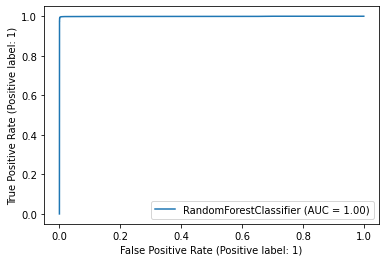

In [175]:
plot_roc_curve(best_model,X,y)   #--> ROC curve on the test data

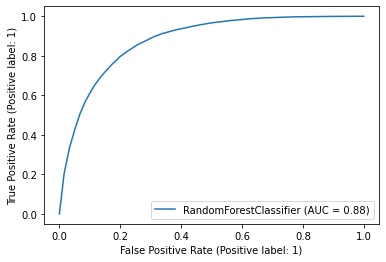

In [176]:
plot_roc_curve(best_model,X_test,y_test)  # --> ROC curve onthe test data

In [177]:
feature_imp_df = pd.DataFrame(best_model.feature_importances_,index=X.columns,columns=['feature_importance'])

In [178]:
feature_imp_df.sort_values('feature_importance',ascending=False,inplace=True)

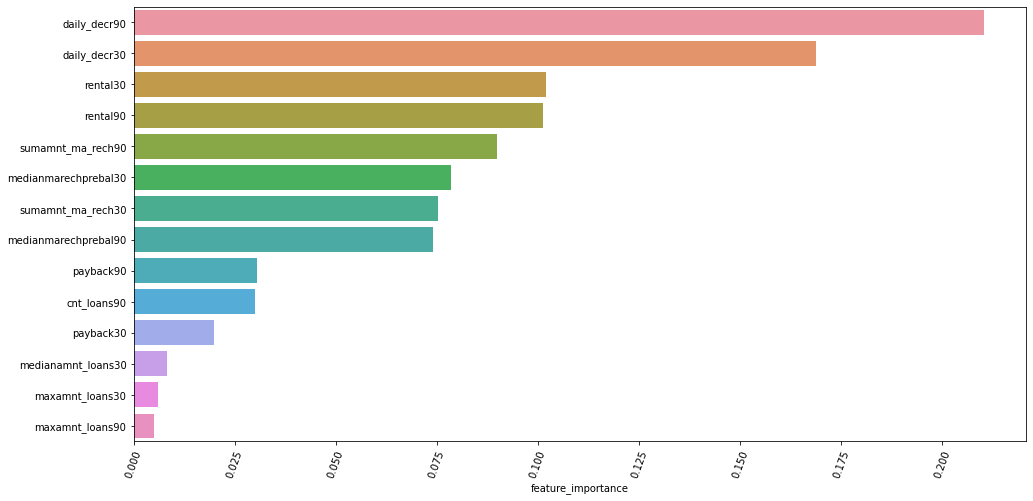

In [179]:
plt.figure(figsize=(16,8))
sns.barplot(feature_imp_df.feature_importance,feature_imp_df.index)
plt.xticks(rotation=70);

## Saving the model

In [180]:
import joblib

In [181]:
joblib.dump(best_model,'FR_ASSINGNMENT_MCD.pkl')

['FR_ASSINGNMENT_MCD.pkl']